In [1]:
from csv import DictReader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

path = os.getcwd()
path_partido = path + '\\Gráficos\\Partidos\\'
path_estado = path + '\\Gráficos\\Estados\\'
try:
    os.mkdir(path_partido)
    os.mkdir(path_estado)
except Exception as e:
    print('Diretório já existe!')

def registro_base():
    """Retorna um dicionário para guardar as informações dos candidatos"""
    return {'MASCULINO': 0, 'FEMININO': 0, 'NÃO INFORMADO': 0}


UF_ESTADOS = [
    'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'ES', 'GO', 'MA', 'MG','MS', 'MT', 'PA',
    'PB', 'PE','PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'
]

estados_sexo_candidatos = {}
partidos_sexo_candidatos = {}
anos = np.arange(2010,2021,2)

Diretório já existe!


In [9]:
def plotarGrafico(fem, title, x_title, y_title, info_x, caminho):
    print('Criando gráfico...')
    index = np.arange(0, len(info_x))
    bar_width = 1
    plotsize = 120/27 * len(info_x)
    fig, ax = plt.subplots(figsize=(int(plotsize), 60))
    size = {'fontsize': 100}

  #  masculino = ax.bar(index - bar_width/2, masc, bar_width, label="Masculino", color='#0D9CFA')
    feminino = ax.bar(index, fem, bar_width, label="Feminino", color='#FF6699', edgecolor='#000000', linewidth=4)
    
    ax.set_xlabel(x_title, size)
    ax.set_ylabel(y_title, size)
    ax.set_title(title, size)
    ax.set_xticks(index)
    #ax.set_xticklabels(info_x)
    ax.set_yticks(np.arange(0,101,10))
    ax.set_yticklabels(np.arange(0,101,10))
    ax.set_xticklabels(info_x, size)
    fig.autofmt_xdate(rotation=45)
    ax.legend(fontsize=100)
    ax.set_ylim(bottom=0,top=100)
    plt.grid(axis='y')

    def inserirDadosTexto(barras):
        for barra in barras:
            bar_height = barra.get_height()
            ax.annotate(
                barra.get_height(),
                xy=(barra.get_x() + barra.get_width() / 2, bar_height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=75
            )

    #inserirDadosTexto(masculino)
    inserirDadosTexto(feminino)

    plt.yticks(np.arange(0,101,10))
    plt.savefig(caminho, bbox_inches='tight')
    print('Gráfico salvo em: ', caminho)
    print('Gráfico criado com sucesso!')
    plt.show()
    
def criarGraficos():
    while(True):
        print('Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020')
        print('0 para sair')
        ano = int(input('->'))
        
        if(ano == 0): break
        
        ''' GRÁFICOs DOS ESTADOS '''
        print('SELECIONANDO DADOS DOS ESTADOS DE',ano)
        df = pd.DataFrame.from_dict(estados_sexo_candidatos)
        df = df.fillna(0)
        estados = df.index.values.tolist() 
        estados_aux = df.index.values.tolist()
      #  masc = []
        fem = []
        for estado in estados:
            if (df.loc[estado, ano] == 0):
                estados_aux.remove(estado)
            else:
                total = df.loc[estado, ano]['MASCULINO'] + df.loc[estado, ano]['FEMININO']
               # porc_masc = df.loc[estado, ano]['MASCULINO'] / total * 100
                porc_fem = df.loc[estado, ano]['FEMININO'] / total * 100

              #  masc.append(float(str((porc_masc))[0:5]))
                fem.append(float(str((porc_fem))[0:5]))
                titulo = 'Participação feminina nas eleições por estado brasileiro: ' + str(ano)
                caminho = path_estado + str(ano)
        plotarGrafico(fem, titulo, 'Estados', 'Quantidade de candidatos do sexo feminino em %', estados_aux, caminho)
        
        
        ''' GRÁFICOs DOS PARTIDOS '''
        print('SELECIONANDO DADOS DOS PARTIDOS DE',ano)
        df = pd.DataFrame.from_dict(partidos_sexo_candidatos)
        df = df.fillna(0)
        partidos = df.index.values.tolist() 
        partidos_aux = df.index.values.tolist()
        #masc = []
        fem = []
        for partido in partidos:
            if (df.loc[partido, ano] == 0):
                partidos_aux.remove(partido)
            else:
                total = df.loc[partido, ano]['MASCULINO'] + df.loc[partido, ano]['FEMININO']
               # porc_masc = df.loc[partido, ano]['MASCULINO'] / total * 100
                porc_fem = df.loc[partido, ano]['FEMININO'] / total * 100

               # masc.append(round(porc_masc, 1))
                fem.append(round(porc_fem, 1))
                titulo = 'Participação feminina nas eleições por partido político: ' + str(ano)
                caminho = path_partido + str(ano)
        plotarGrafico(fem, titulo, 'Partidos', 'Quantidade de candidatos do sexo feminino em %', partidos_aux, caminho)


In [3]:
for ano in range(2010, 2013, 2):
    estados_sexo_candidatos[ano] = {}
    for uf_estado in UF_ESTADOS:
        estados_sexo_candidatos[ano][uf_estado] = registro_base()
        with open(f'dados\\consulta_cand_{ano}\\' \
            f'consulta_cand_{ano}_{uf_estado}.txt', encoding='ANSI') as arq:
            for linha in arq:
                ind_sexo = 30
                ind_part = 17
                dados = linha.split(';')
                while dados[ind_sexo][1:-1] not in estados_sexo_candidatos[ano][uf_estado]:
                    ind_sexo += 1
                while dados[ind_part][1:-1].isnumeric():
                    ind_part += 1
                if ano not in partidos_sexo_candidatos:
                    partidos_sexo_candidatos[ano] = {}
                if dados[ind_part][1:-1] not in partidos_sexo_candidatos[ano]:
                    partidos_sexo_candidatos[ano][dados[ind_part][1:-1]] = registro_base()
                estados_sexo_candidatos[ano][uf_estado][dados[ind_sexo][1:-1]] += 1
                partidos_sexo_candidatos[ano][dados[ind_part][1:-1]][dados[ind_sexo][1:-1]] += 1

In [4]:
for ano in range(2014, 2021, 2):
    estados_sexo_candidatos[ano] = {}
    for uf_estado in UF_ESTADOS:
        estados_sexo_candidatos[ano][uf_estado] = registro_base()
        with open(f'dados\\consulta_cand_{ano}\\' \
            f'consulta_cand_{ano}_{uf_estado}.csv', encoding='ANSI') as arq:
            for linha in DictReader(arq, delimiter=';'):
                if linha['DS_GENERO'] == 'NÃO DIVULGÁVEL':
                    linha['DS_GENERO'] = 'NÃO INFORMADO'
                if ano not in partidos_sexo_candidatos:
                    partidos_sexo_candidatos[ano] = {}
                if linha['SG_PARTIDO'] not in partidos_sexo_candidatos[ano]:
                    partidos_sexo_candidatos[ano][linha['SG_PARTIDO']] = registro_base()
                estados_sexo_candidatos[ano][uf_estado][linha['DS_GENERO']] += 1
                partidos_sexo_candidatos[ano][linha['SG_PARTIDO']][linha['DS_GENERO']] += 1


## <center>Resultados do ano de 2010</center>

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->2010
SELECIONANDO DADOS DOS ESTADOS DE 2010
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Estados\2010
Gráfico criado com sucesso!


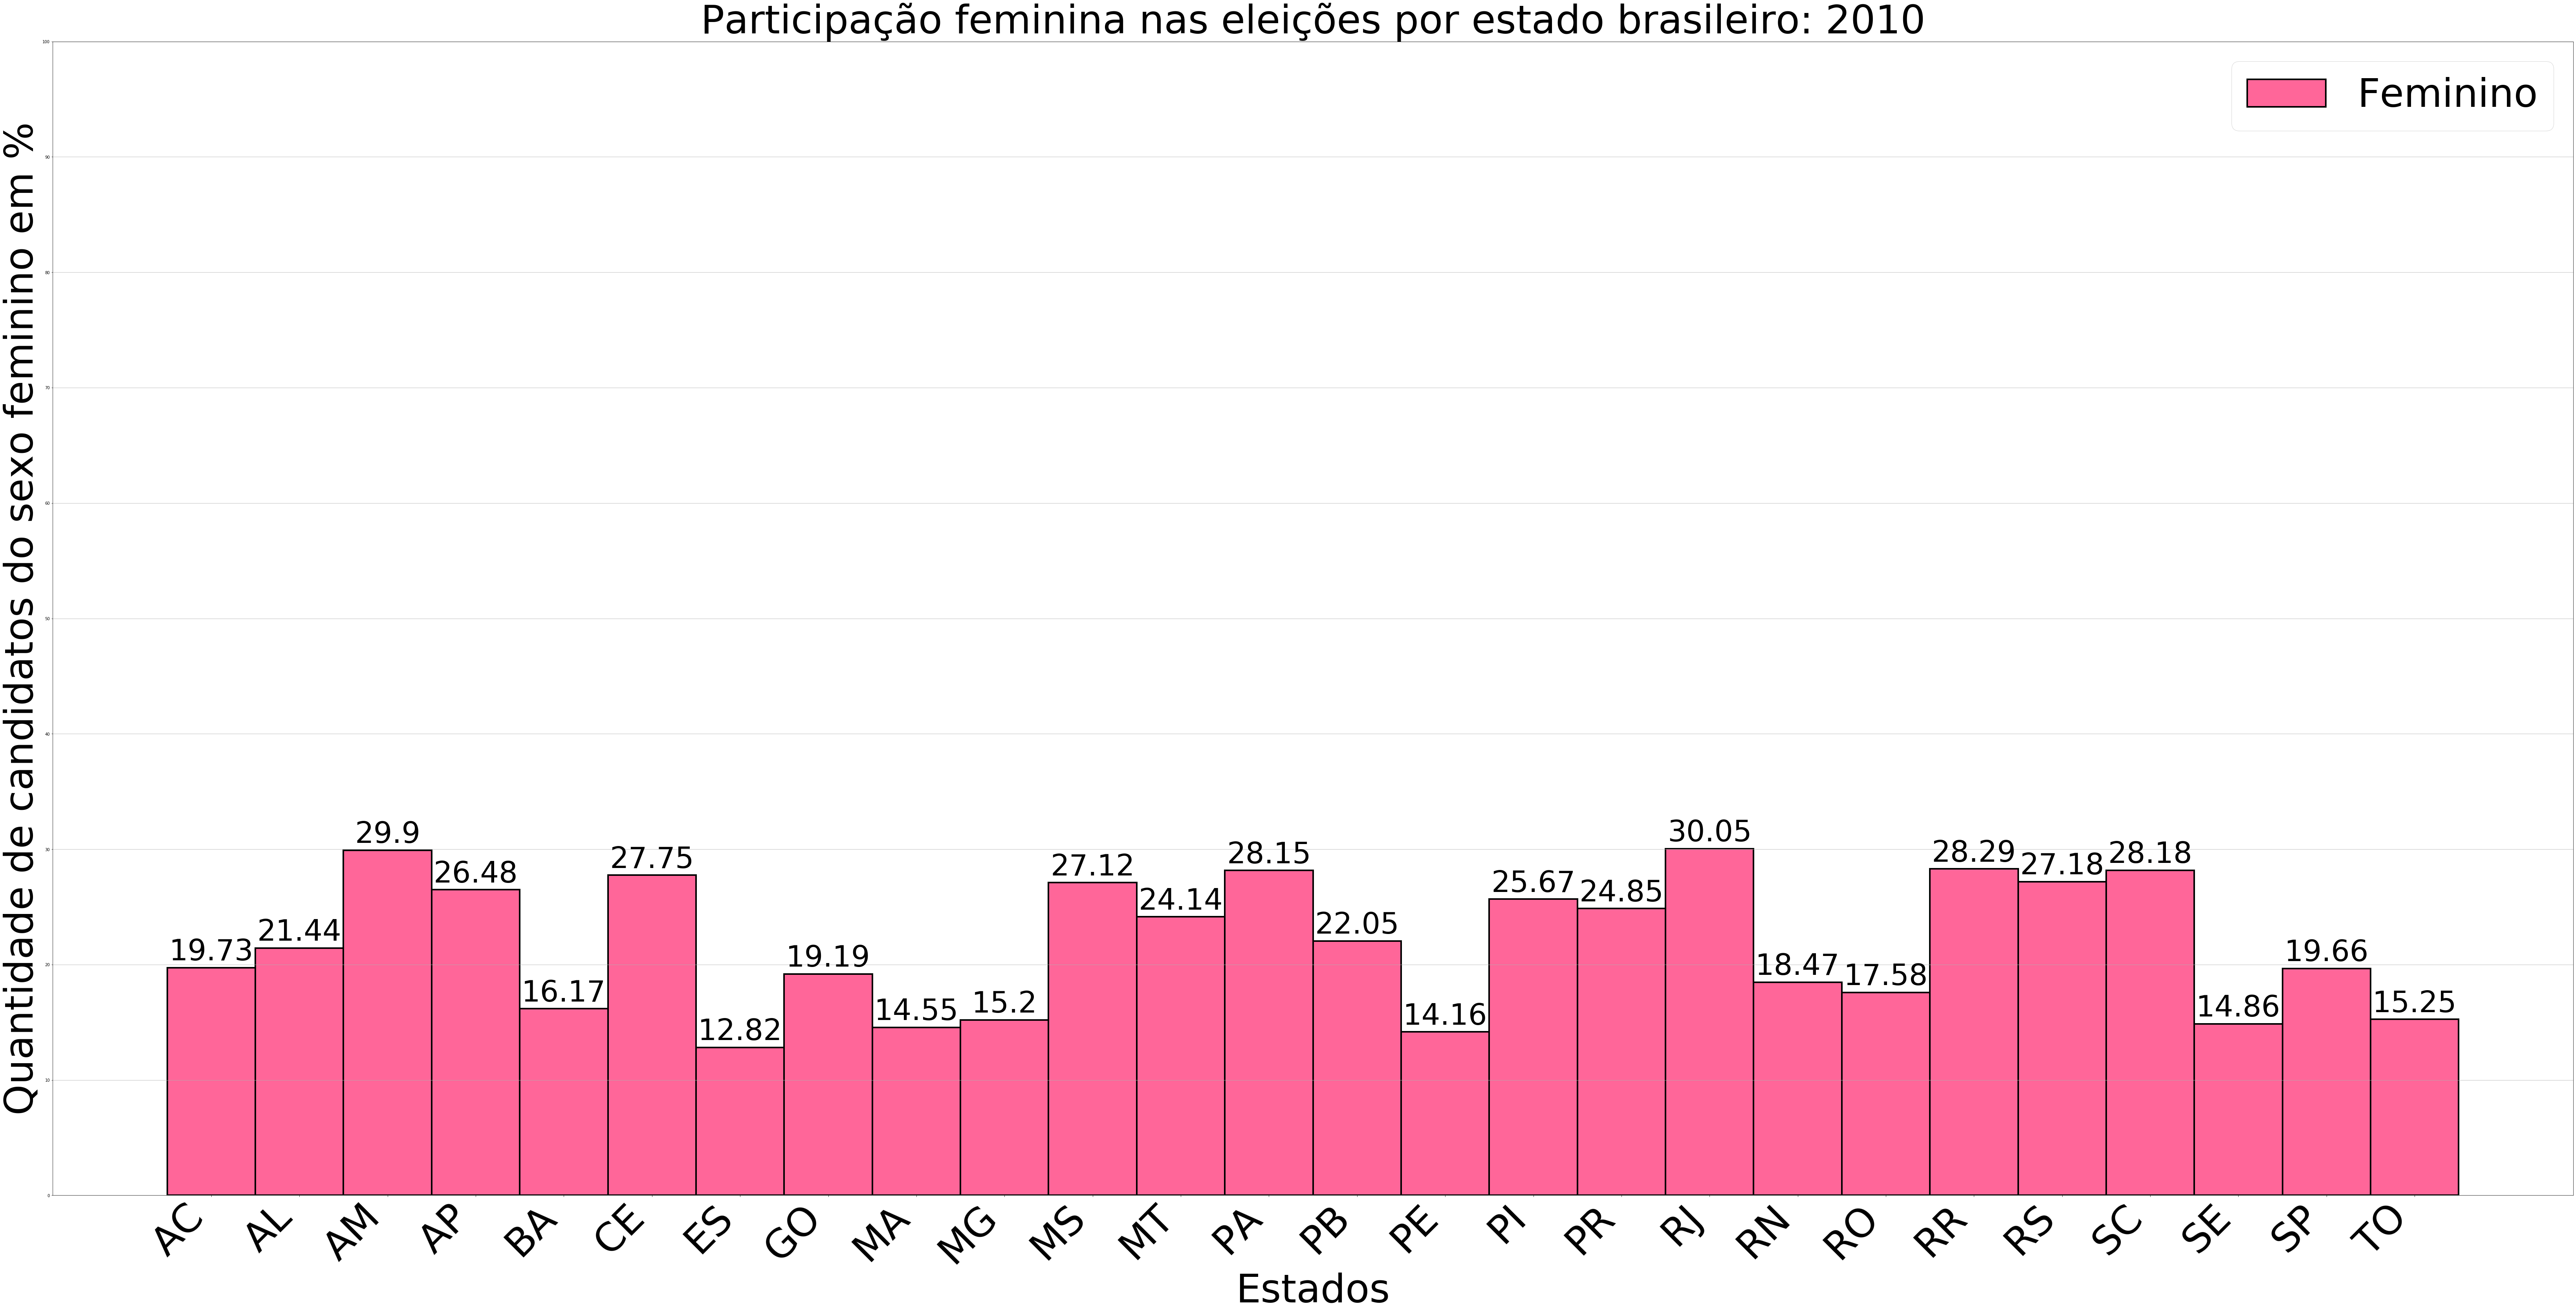

SELECIONANDO DADOS DOS PARTIDOS DE 2010
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Partidos\2010
Gráfico criado com sucesso!


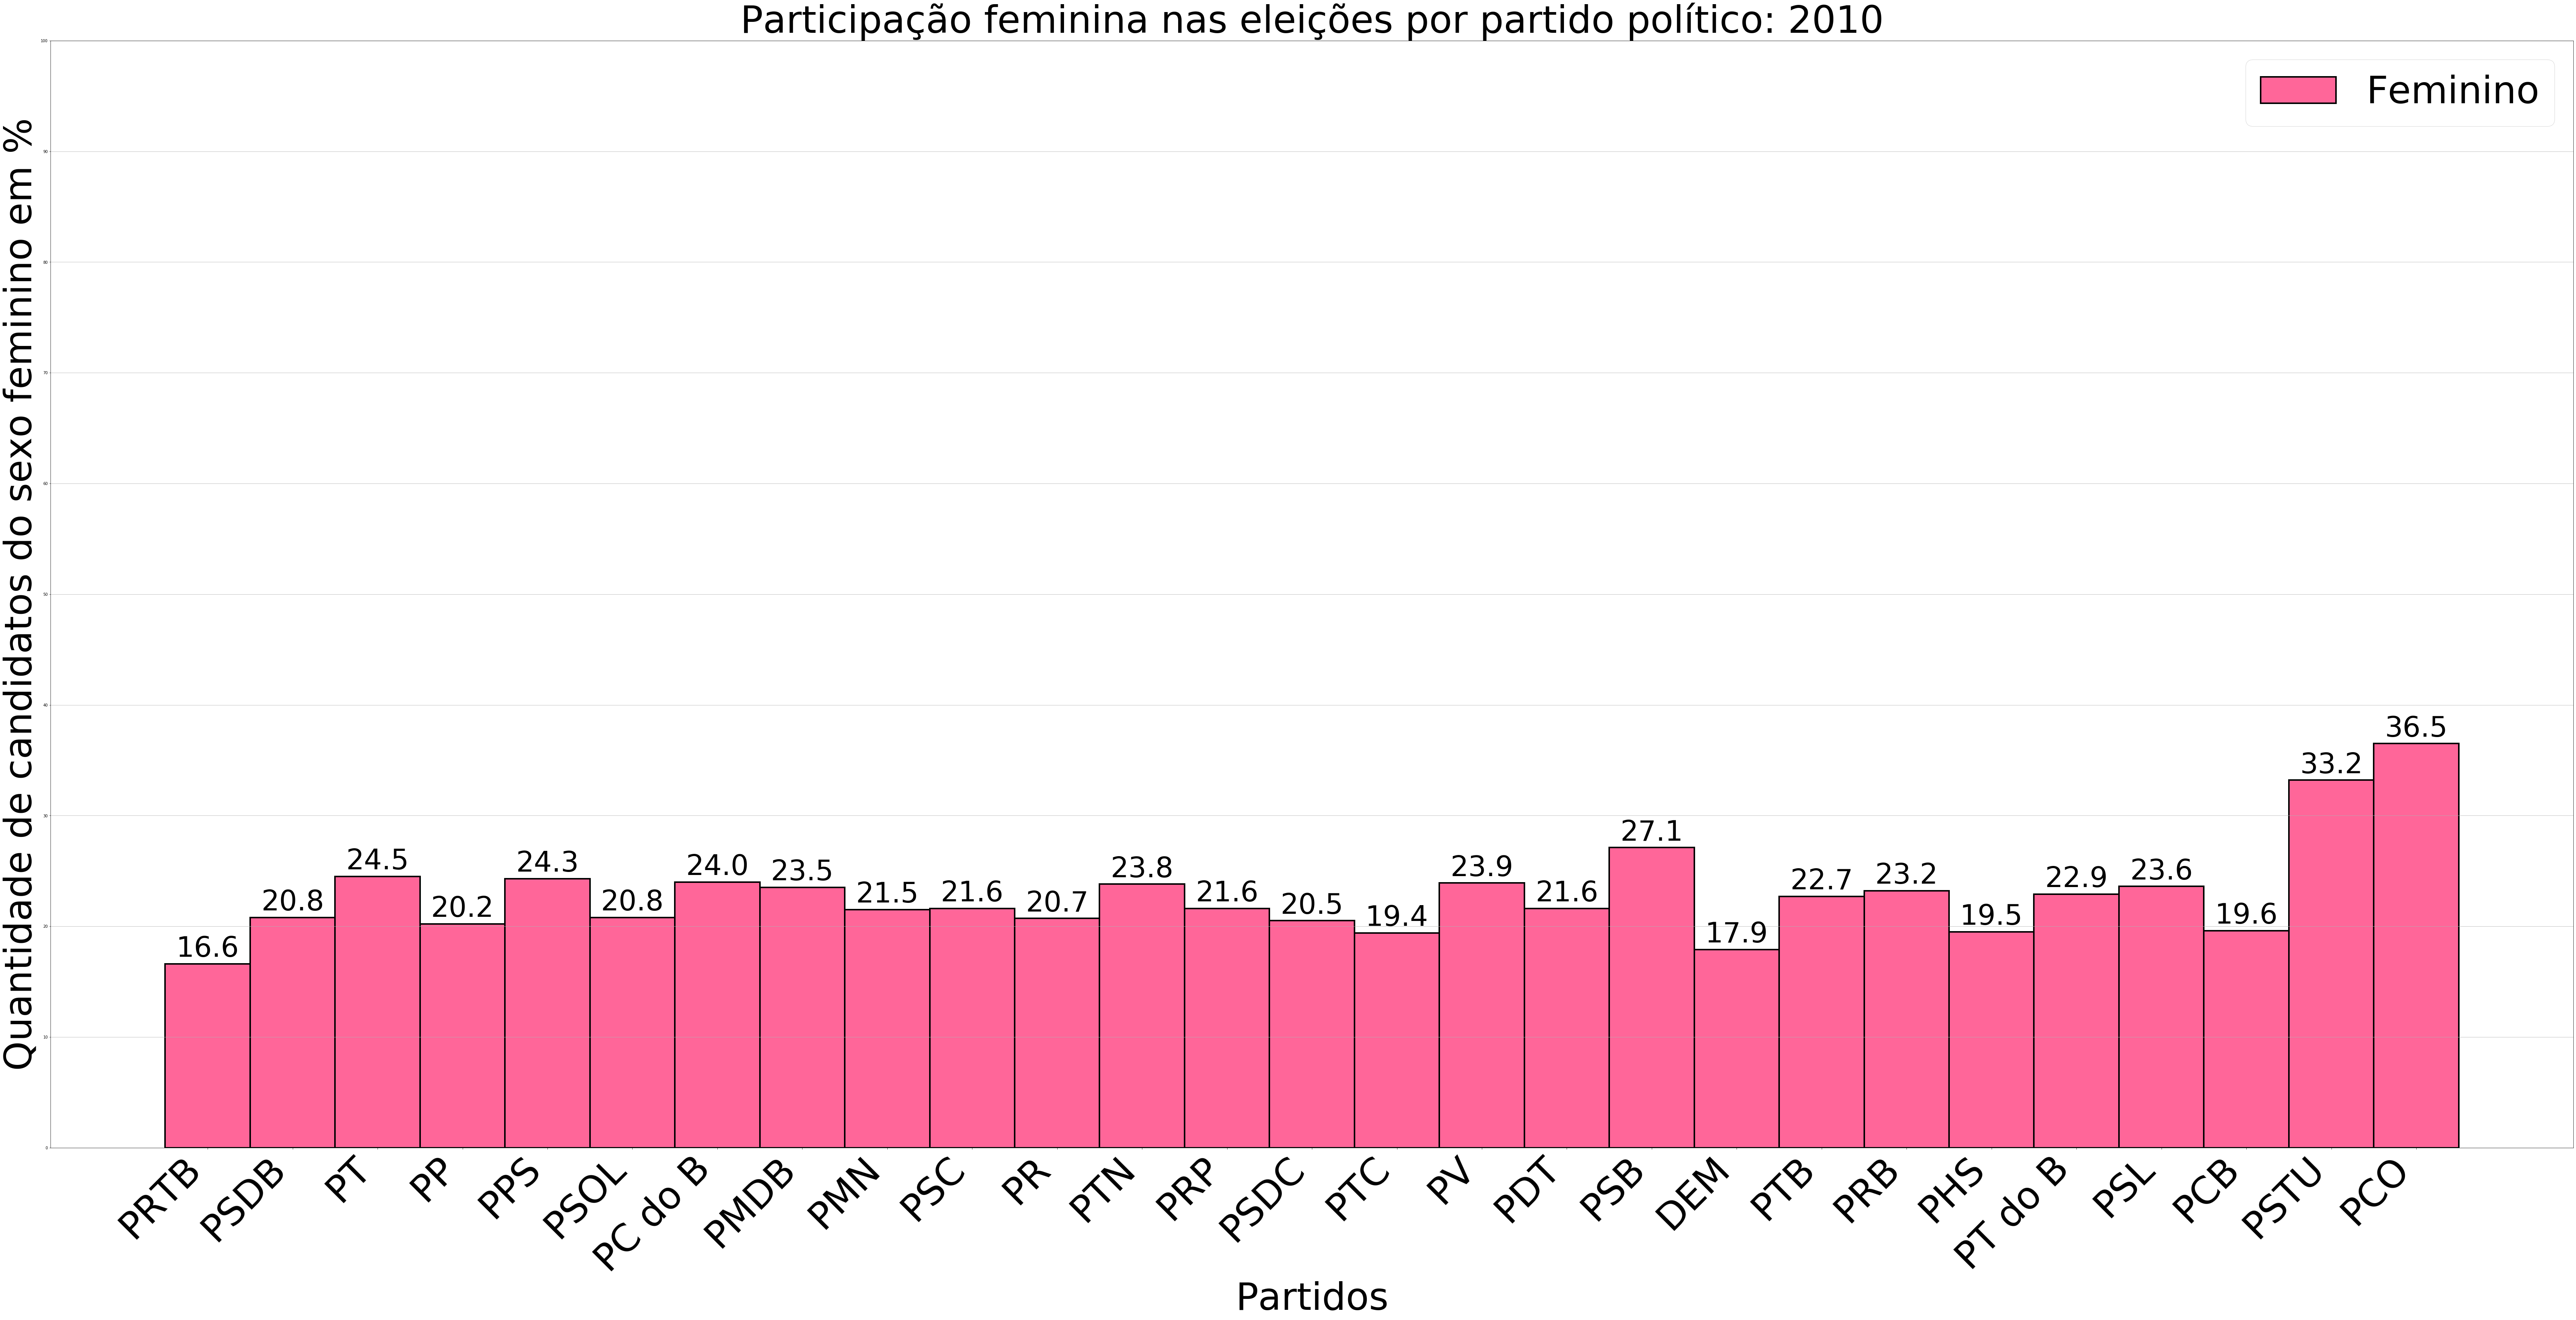

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->0


In [11]:
criarGraficos()

## <center>Resultados do ano de 2012</center>

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->2012
SELECIONANDO DADOS DOS ESTADOS DE 2012
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Estados\2012
Gráfico criado com sucesso!


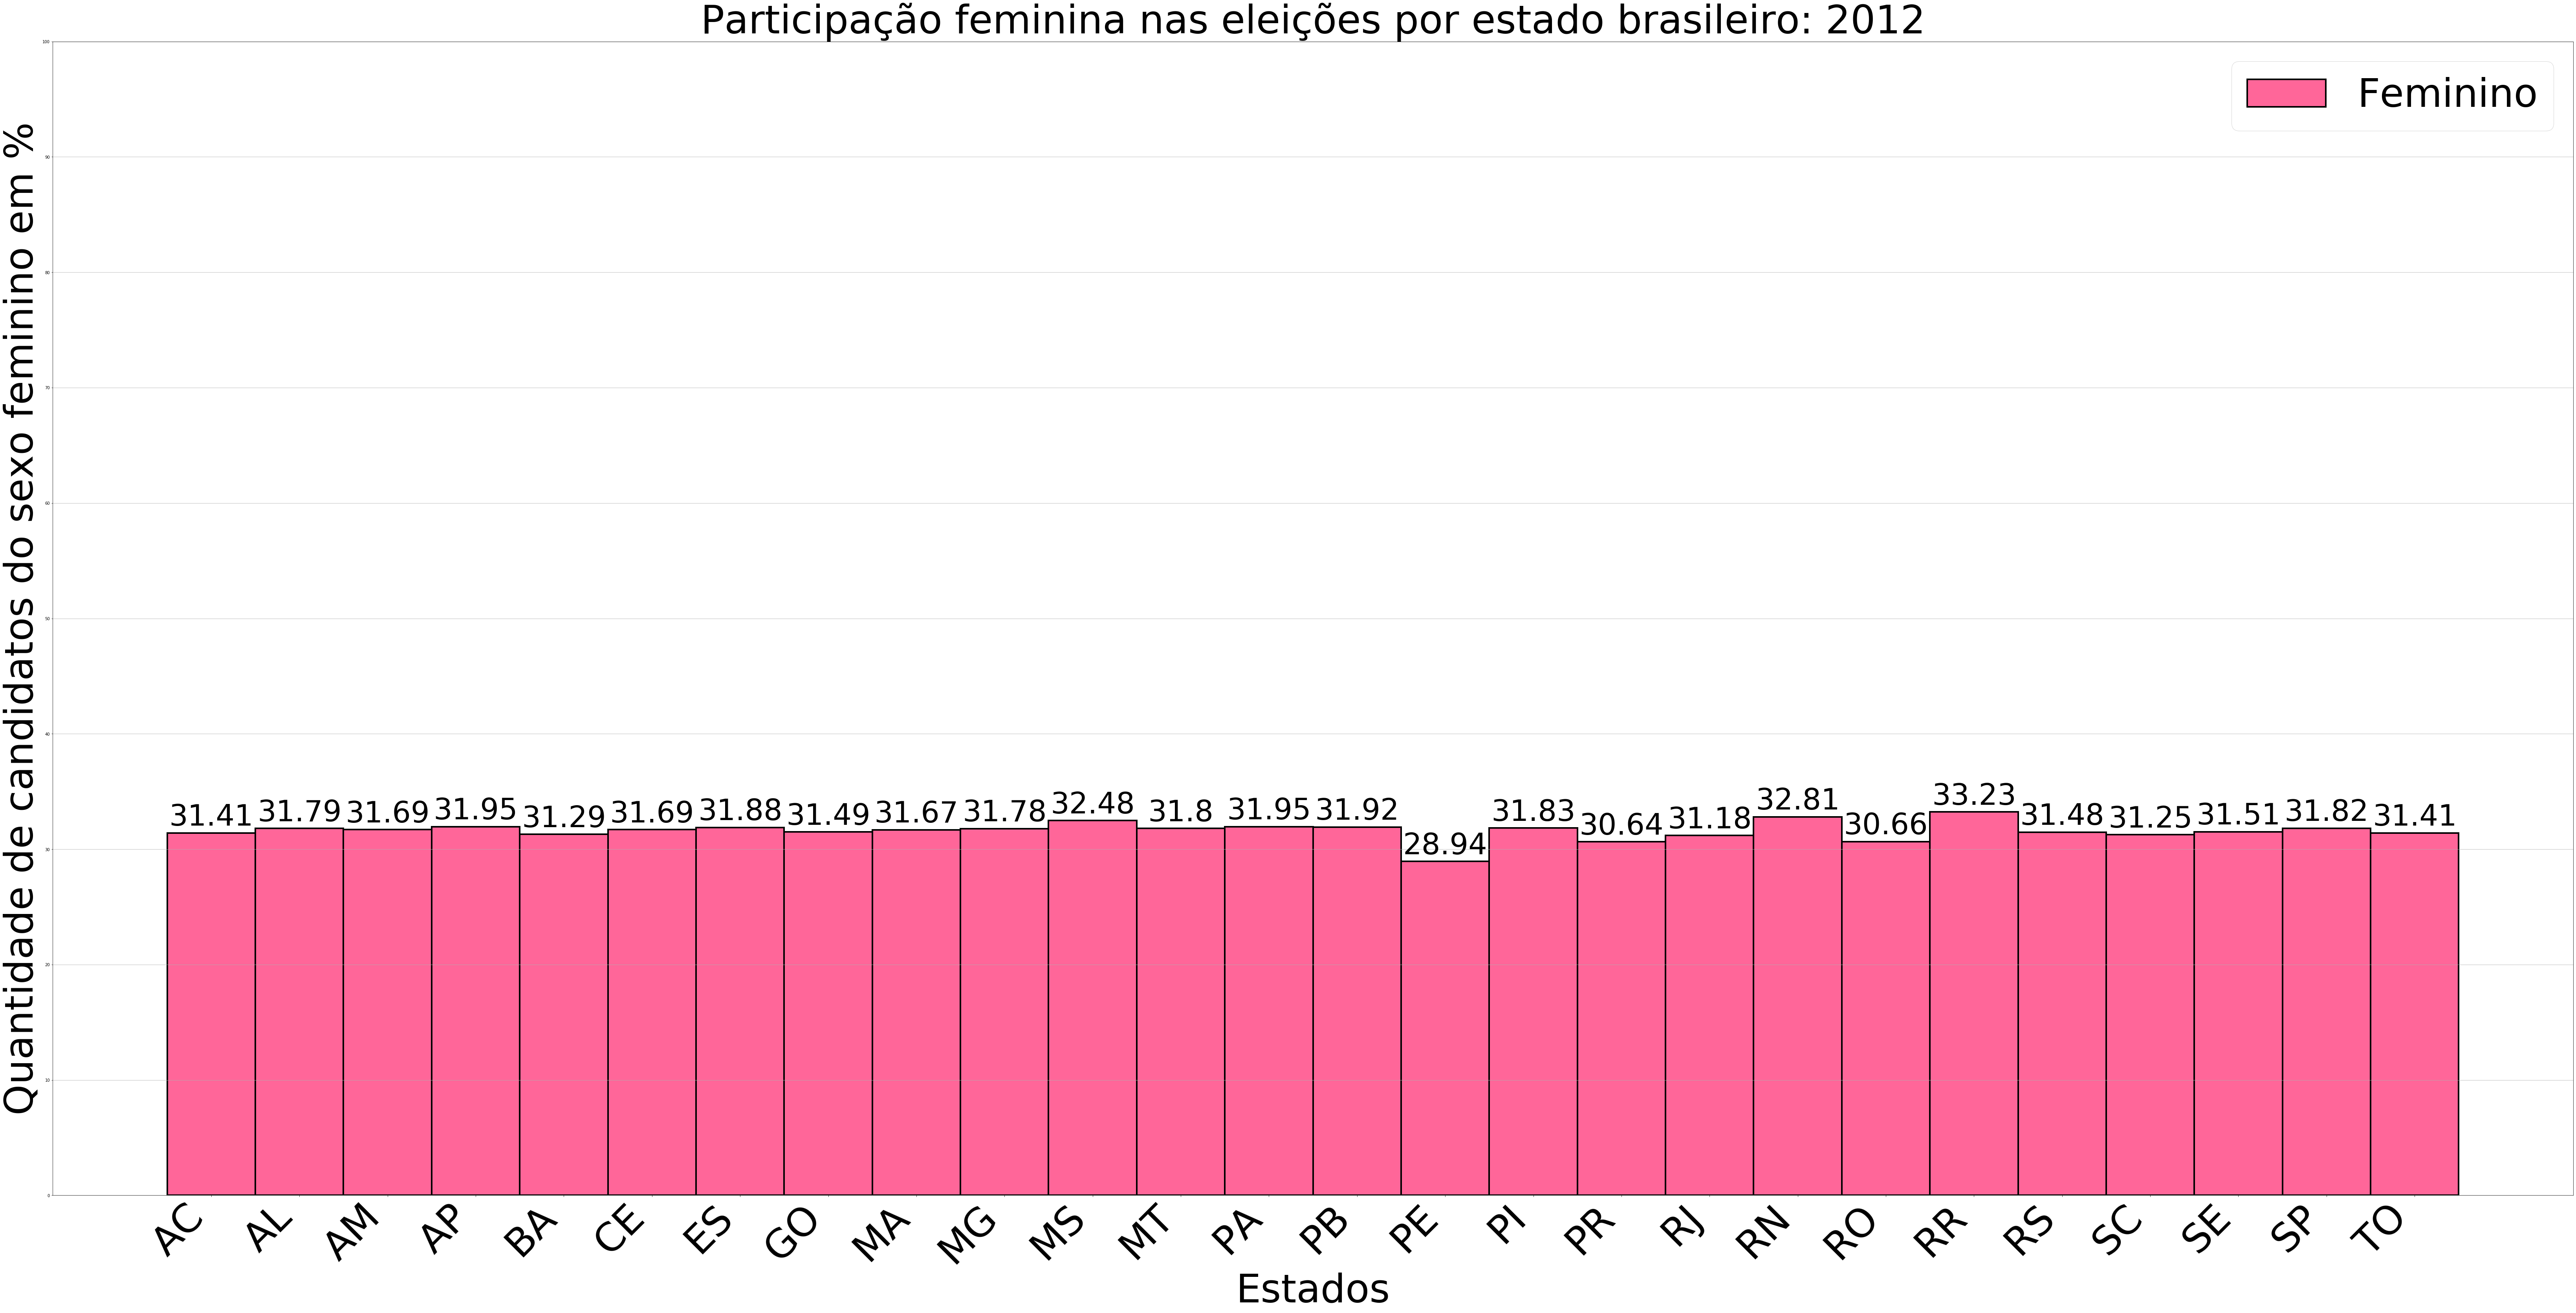

SELECIONANDO DADOS DOS PARTIDOS DE 2012
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Partidos\2012
Gráfico criado com sucesso!


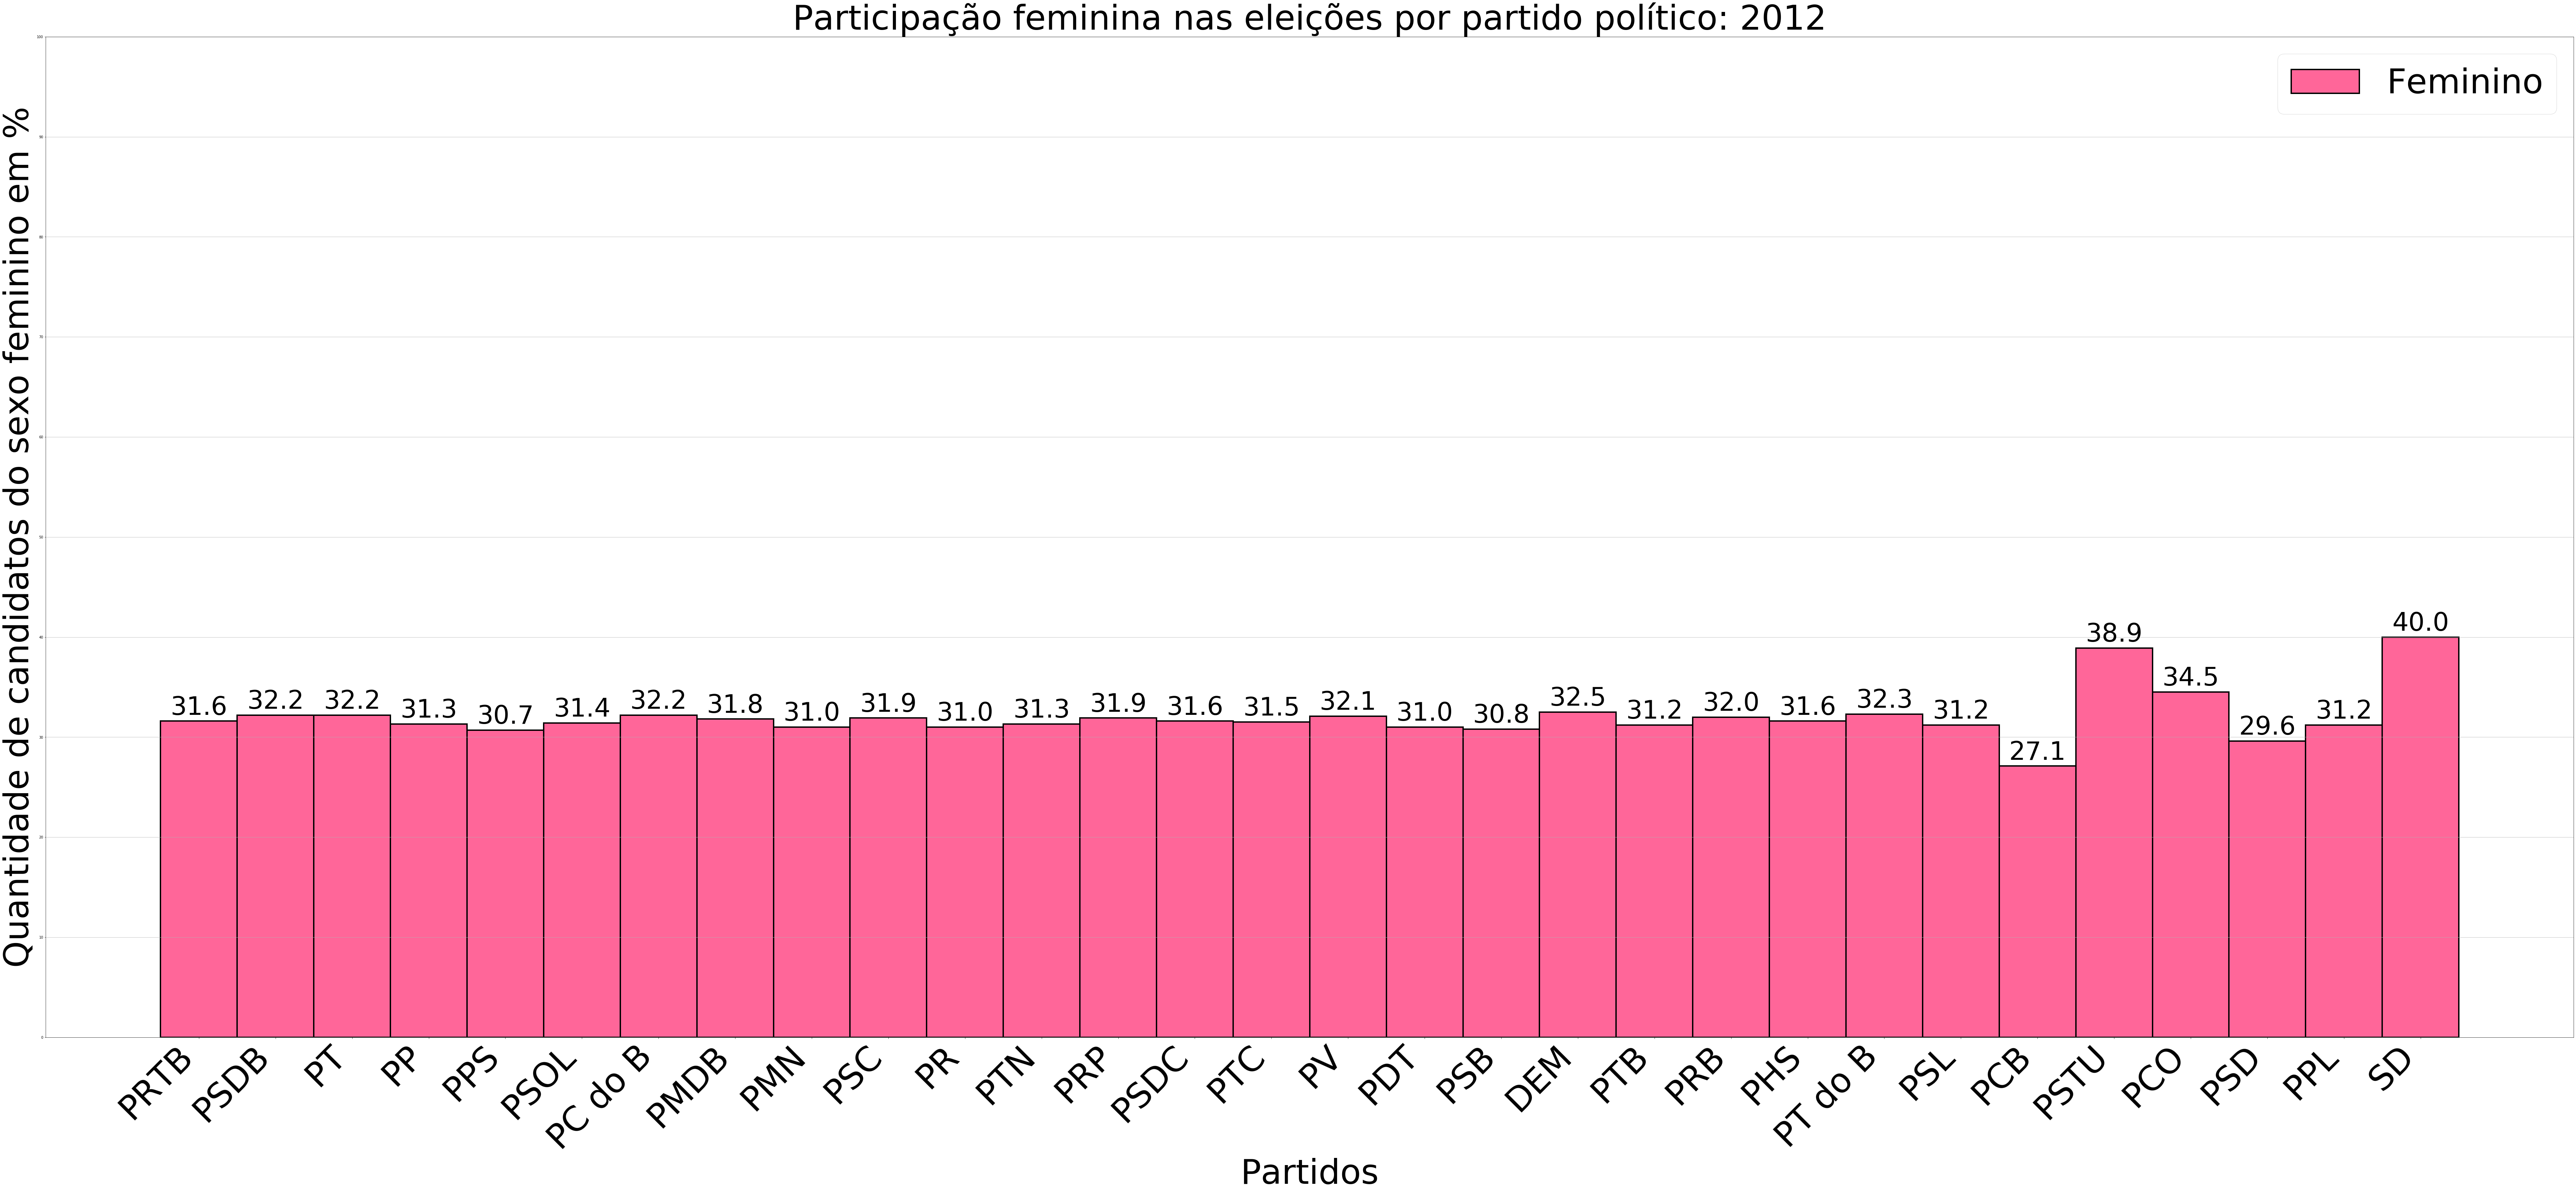

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->0


In [12]:
criarGraficos()

## <center>Resultados do ano de 2014</center>

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->2014
SELECIONANDO DADOS DOS ESTADOS DE 2014
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Estados\2014
Gráfico criado com sucesso!


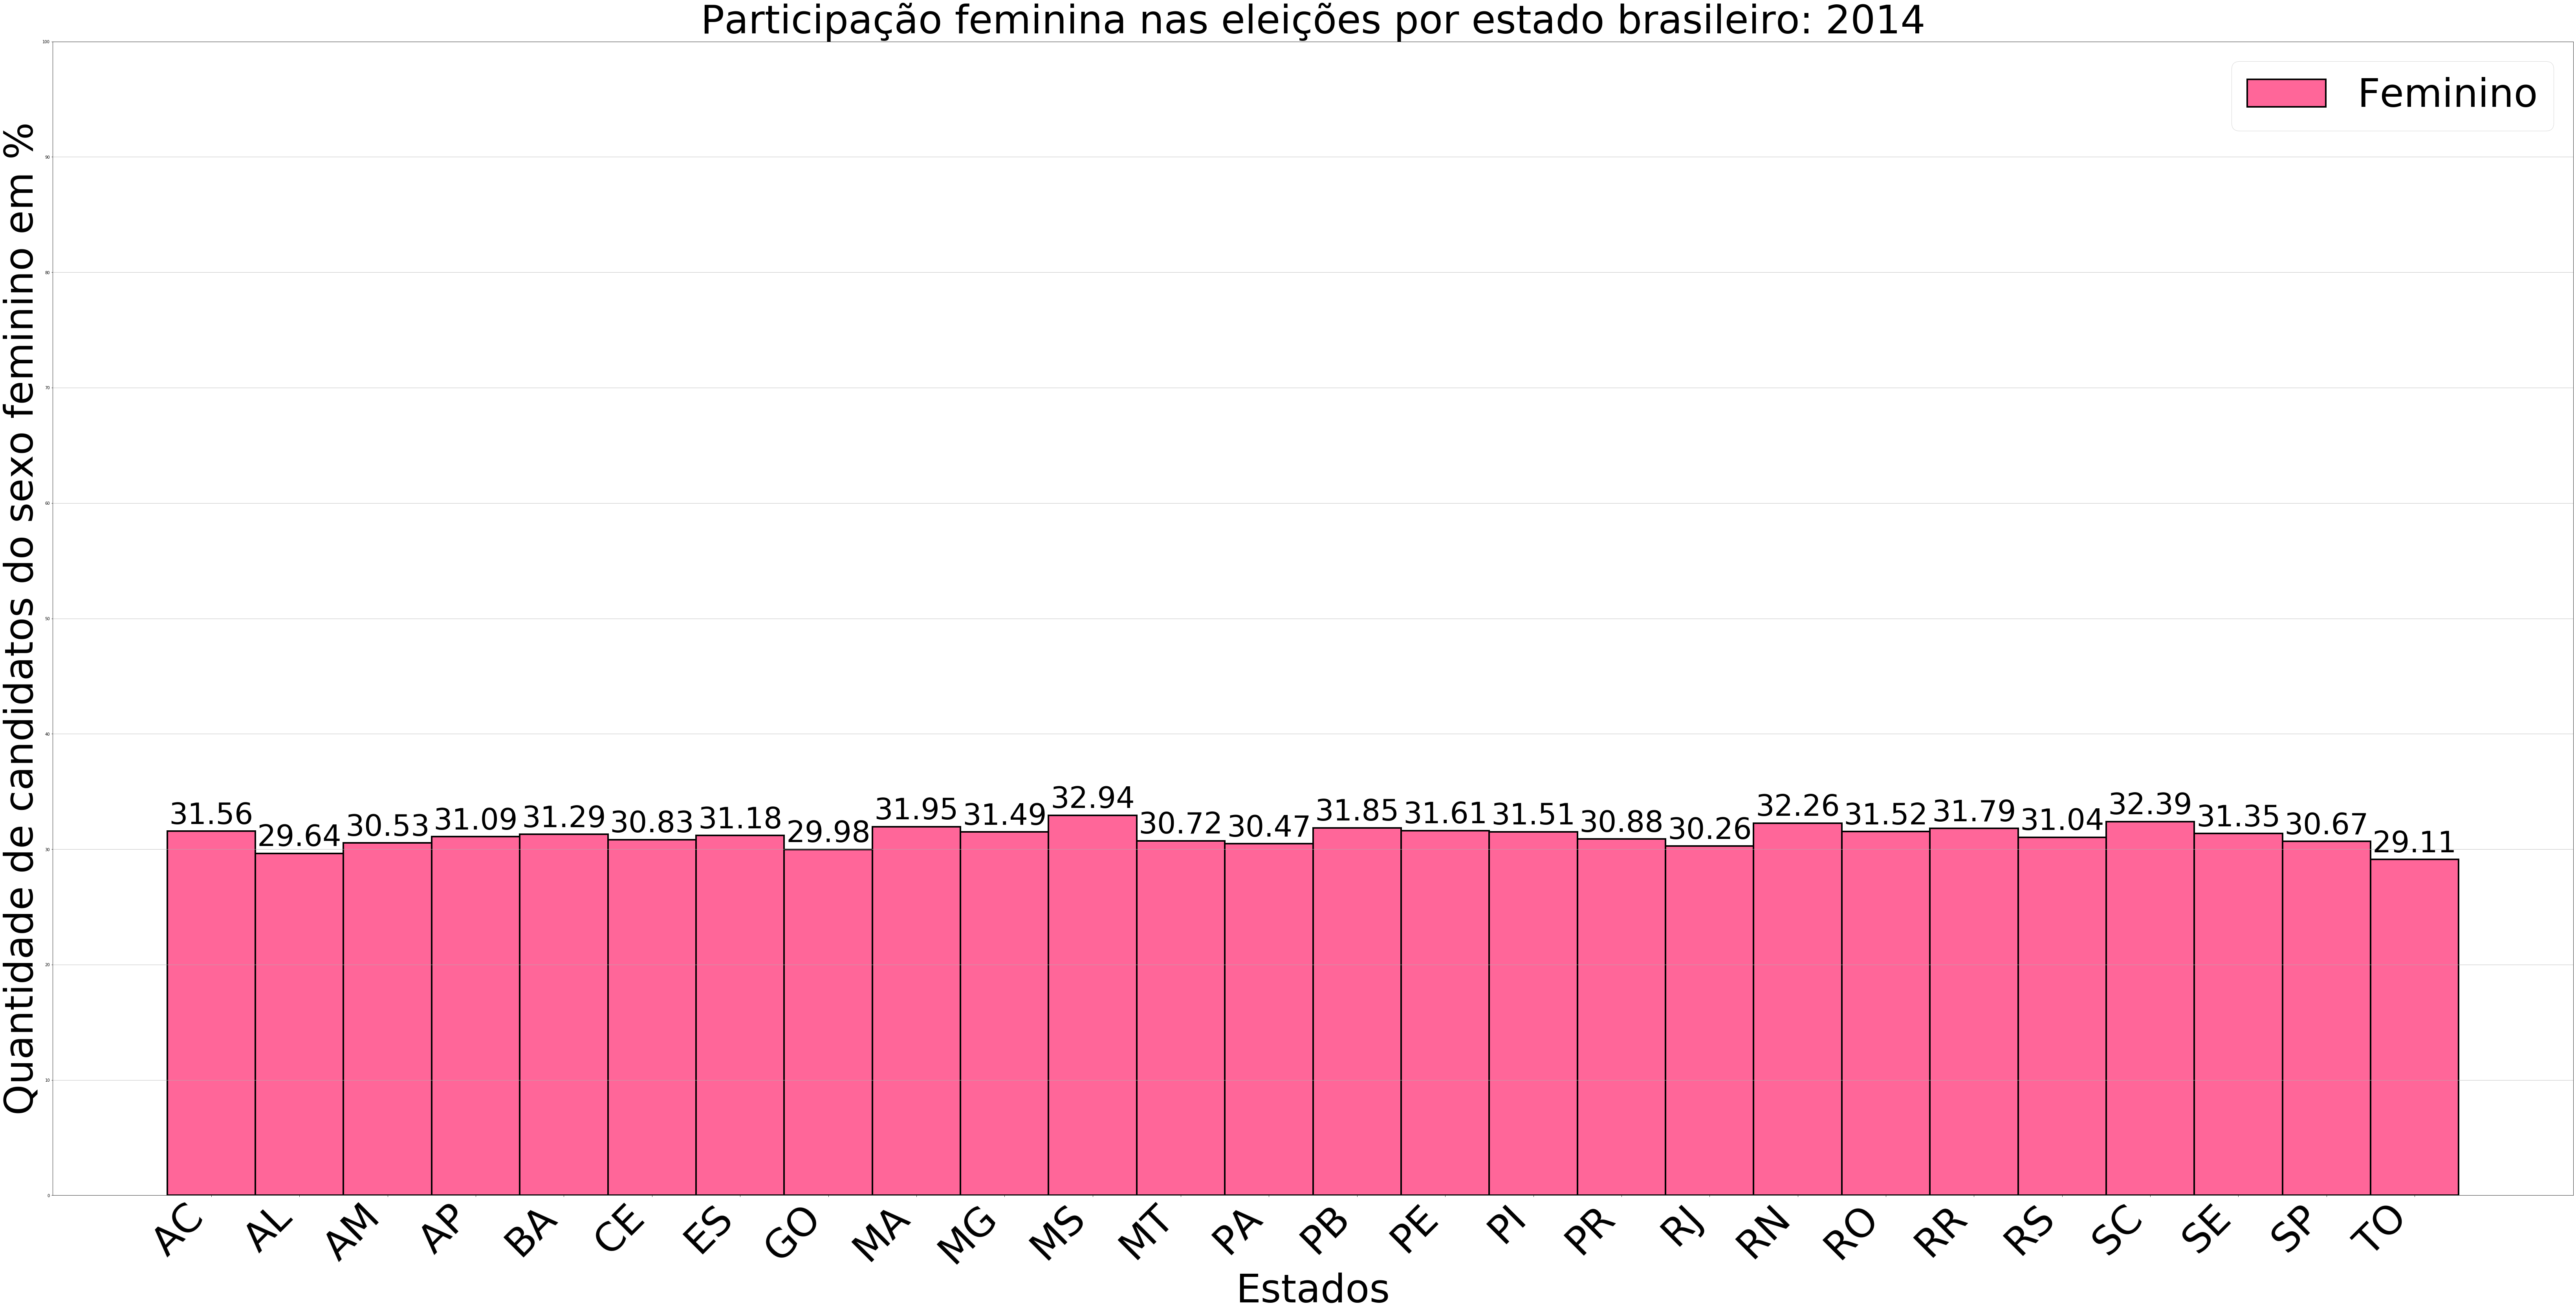

SELECIONANDO DADOS DOS PARTIDOS DE 2014
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Partidos\2014
Gráfico criado com sucesso!


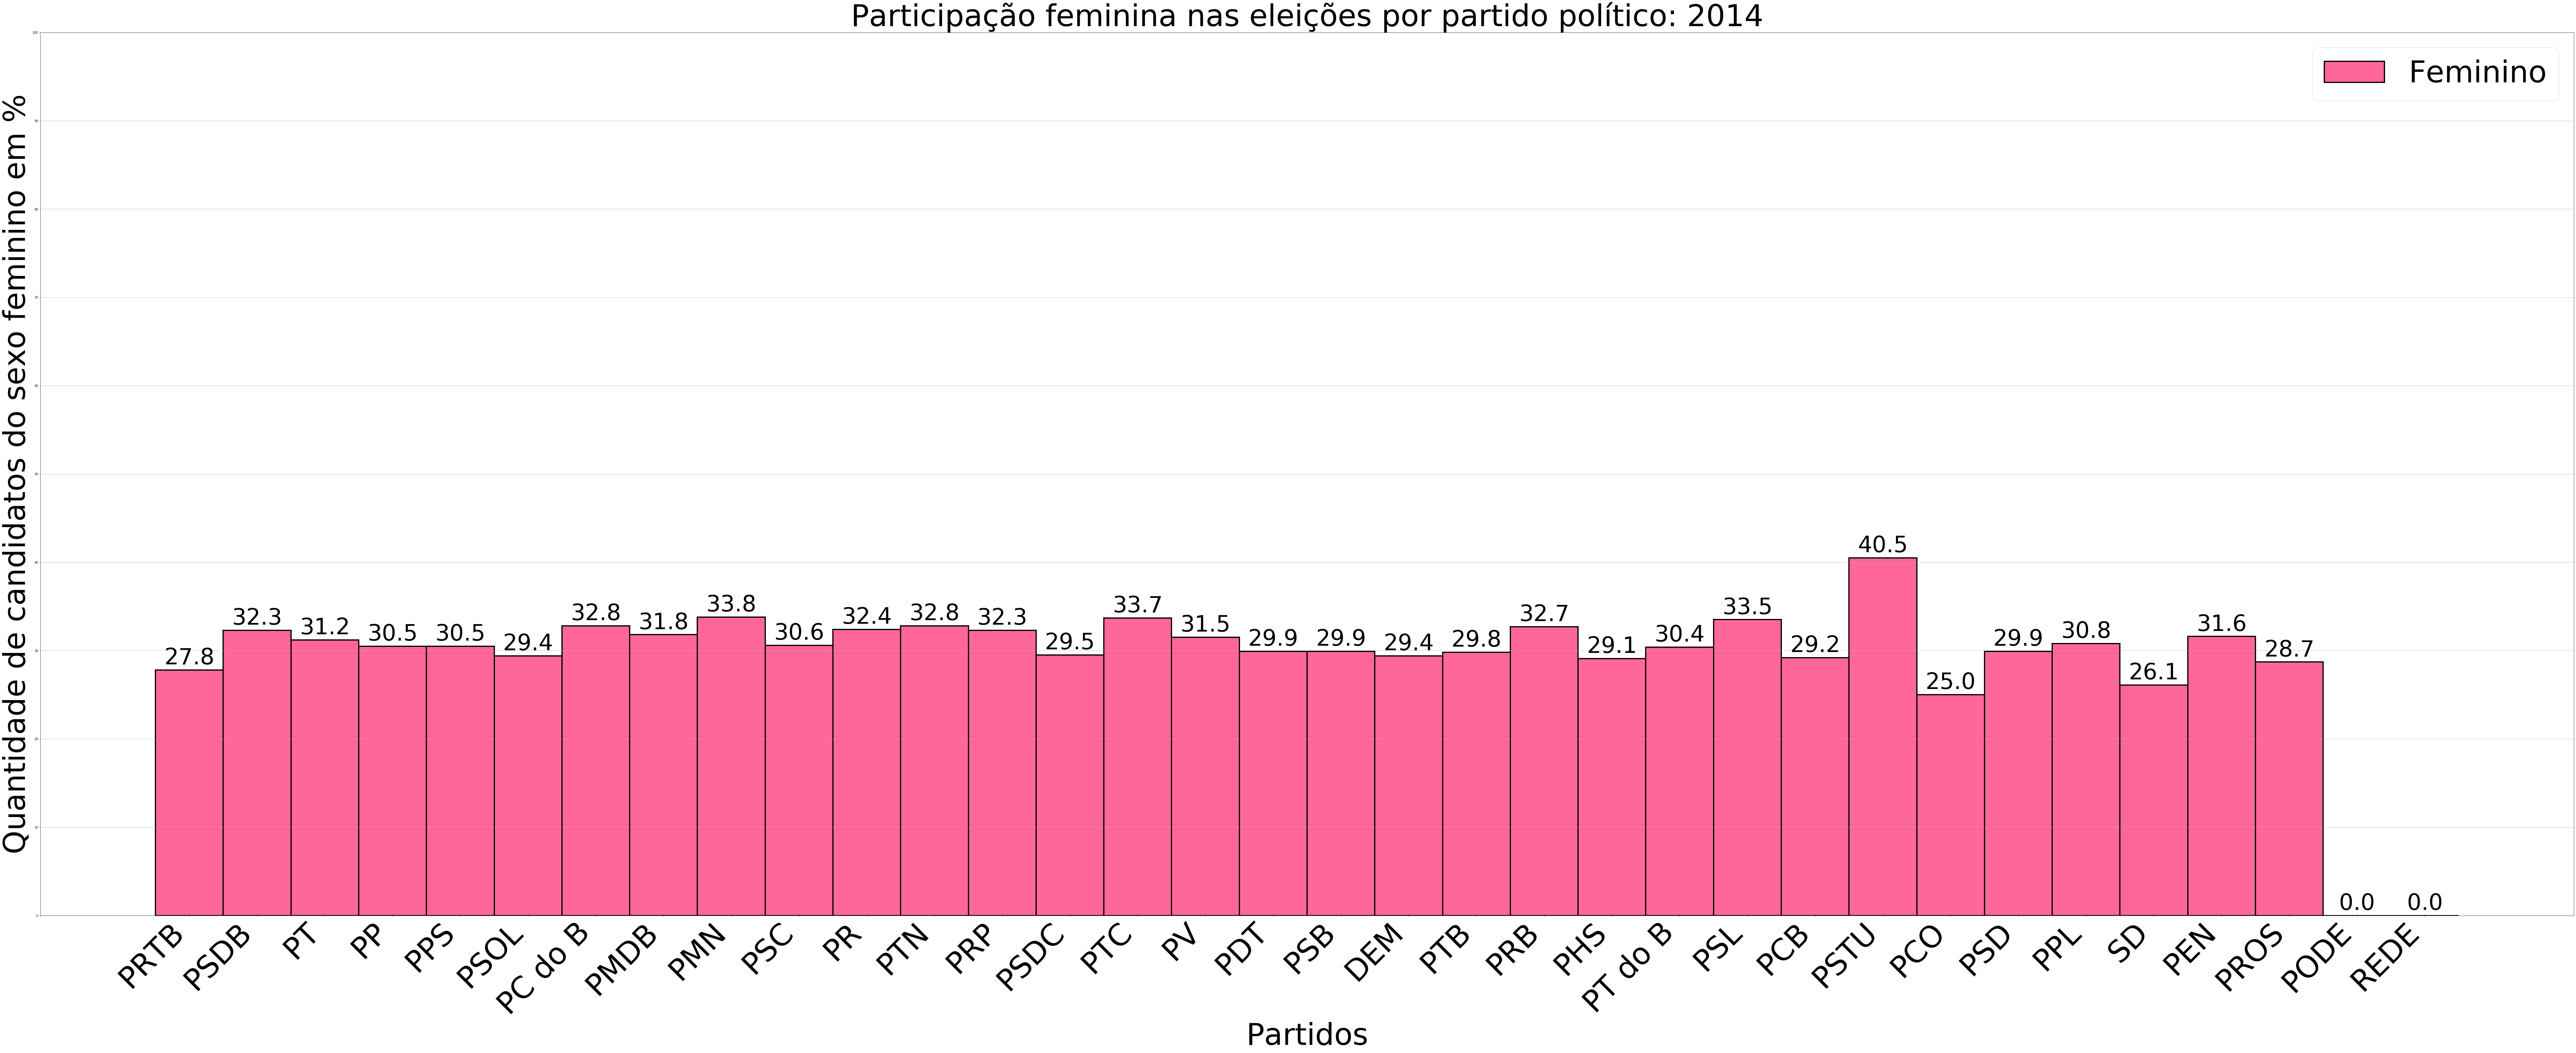

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->0


In [13]:
criarGraficos()

## <center>Resultados do ano de 2016</center>

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->2016
SELECIONANDO DADOS DOS ESTADOS DE 2016
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Estados\2016
Gráfico criado com sucesso!


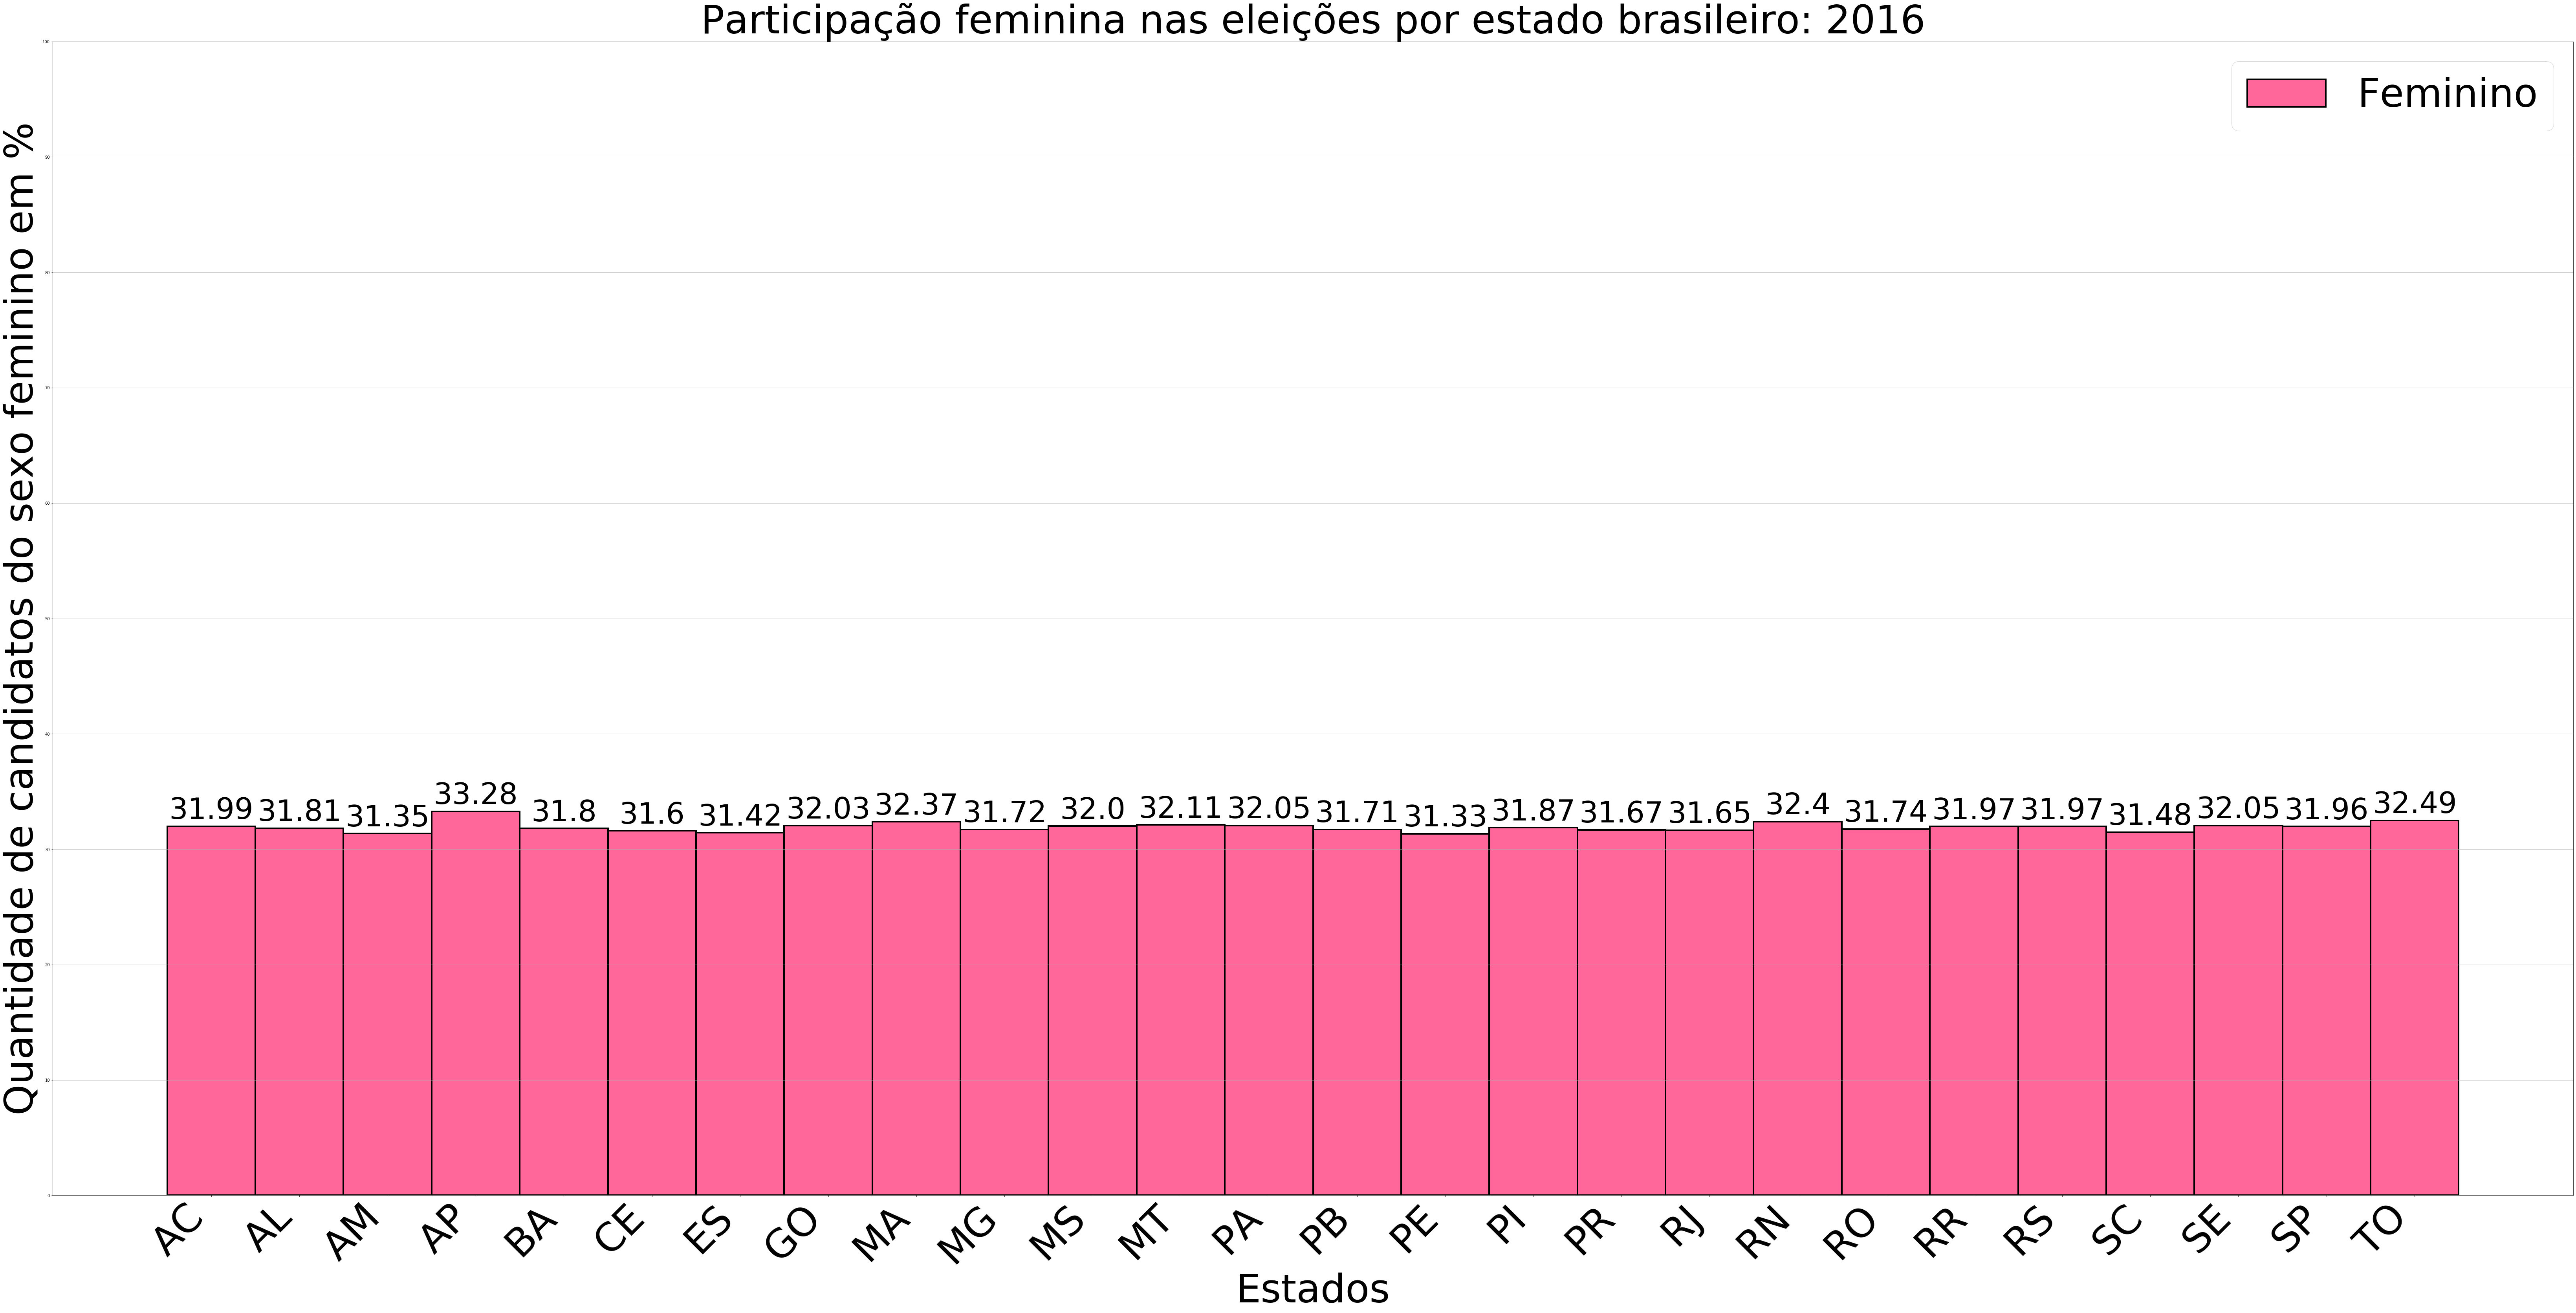

SELECIONANDO DADOS DOS PARTIDOS DE 2016
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Partidos\2016
Gráfico criado com sucesso!


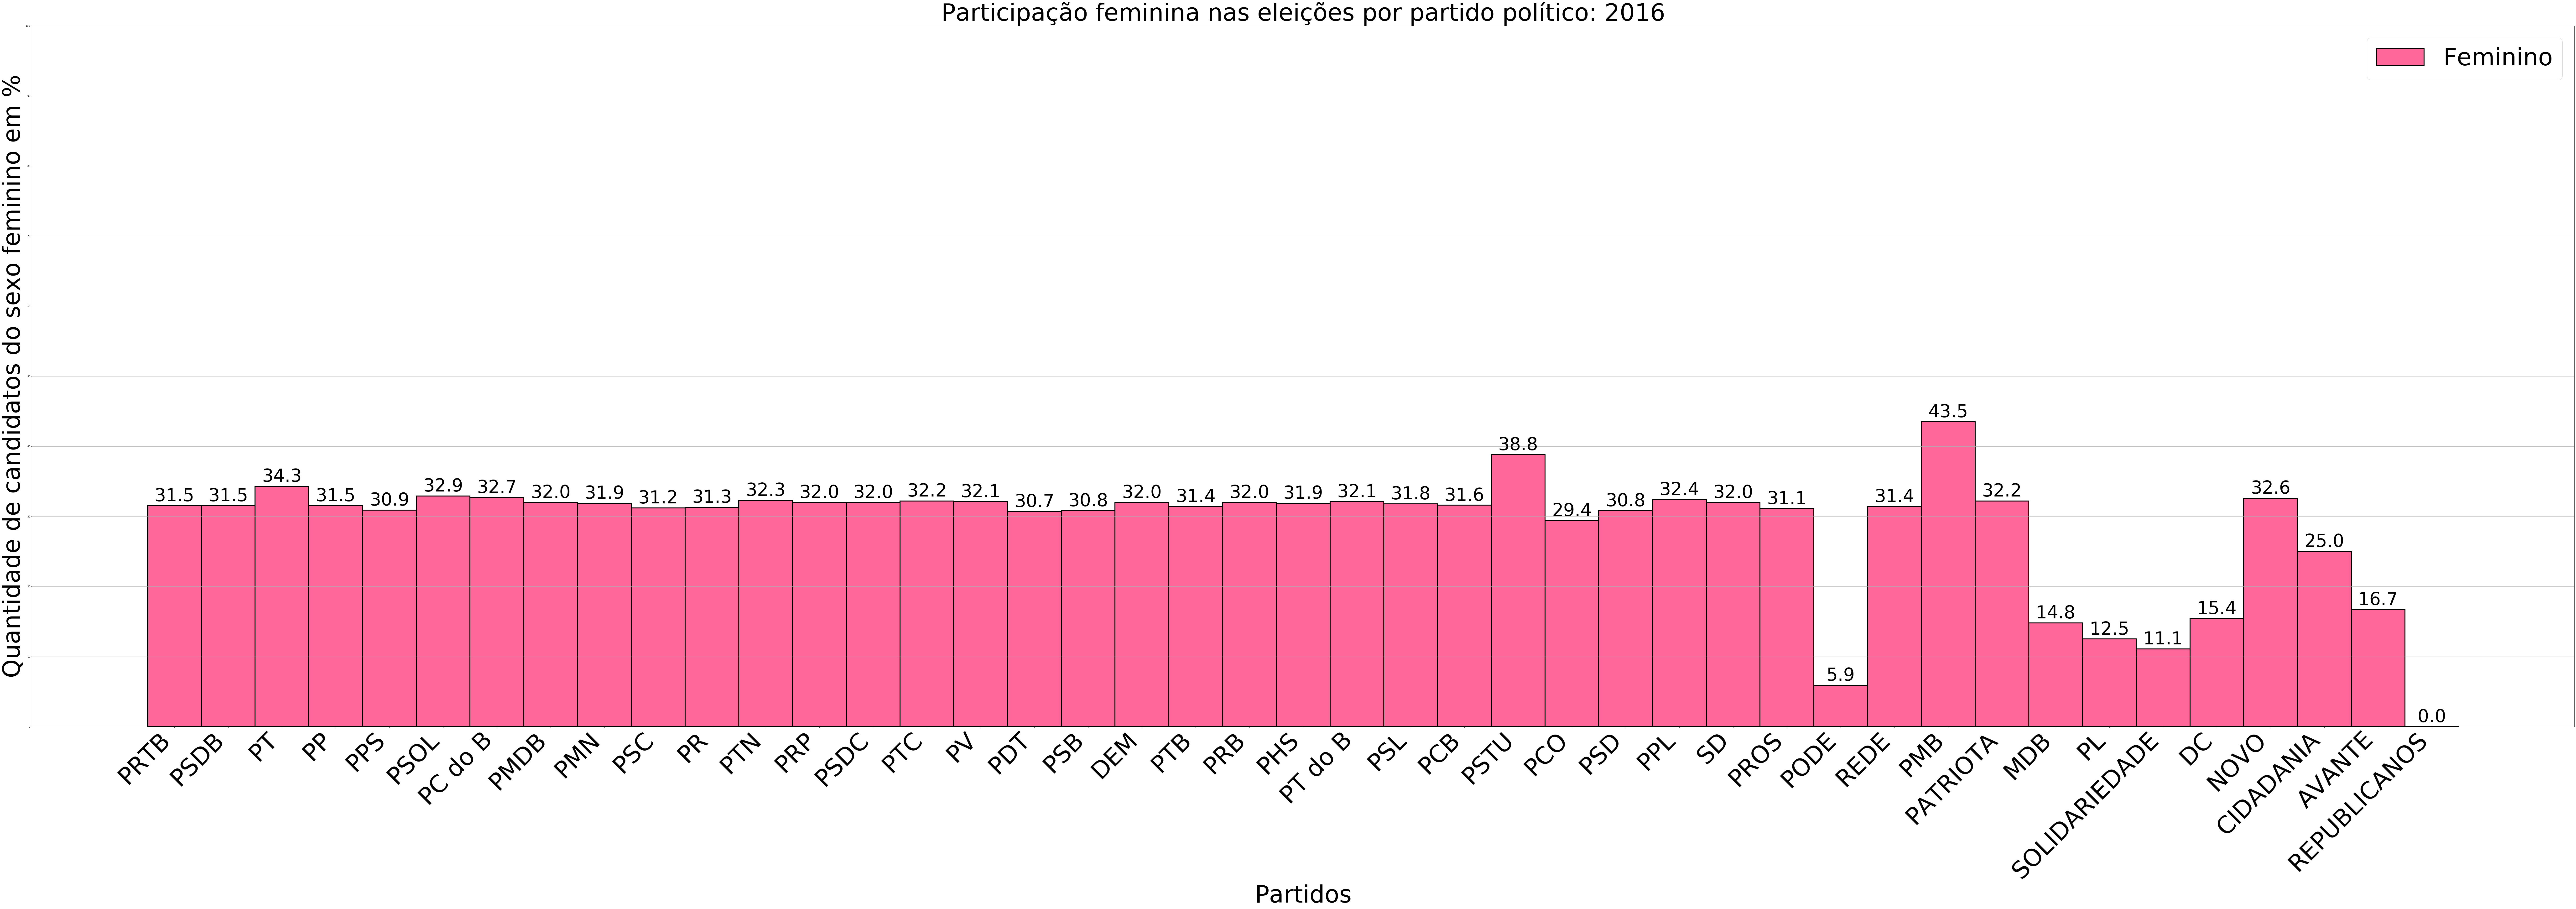

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->0


In [14]:
criarGraficos()

## <center>Resultados do ano de 2018</center>

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->2018
SELECIONANDO DADOS DOS ESTADOS DE 2018
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Estados\2018
Gráfico criado com sucesso!


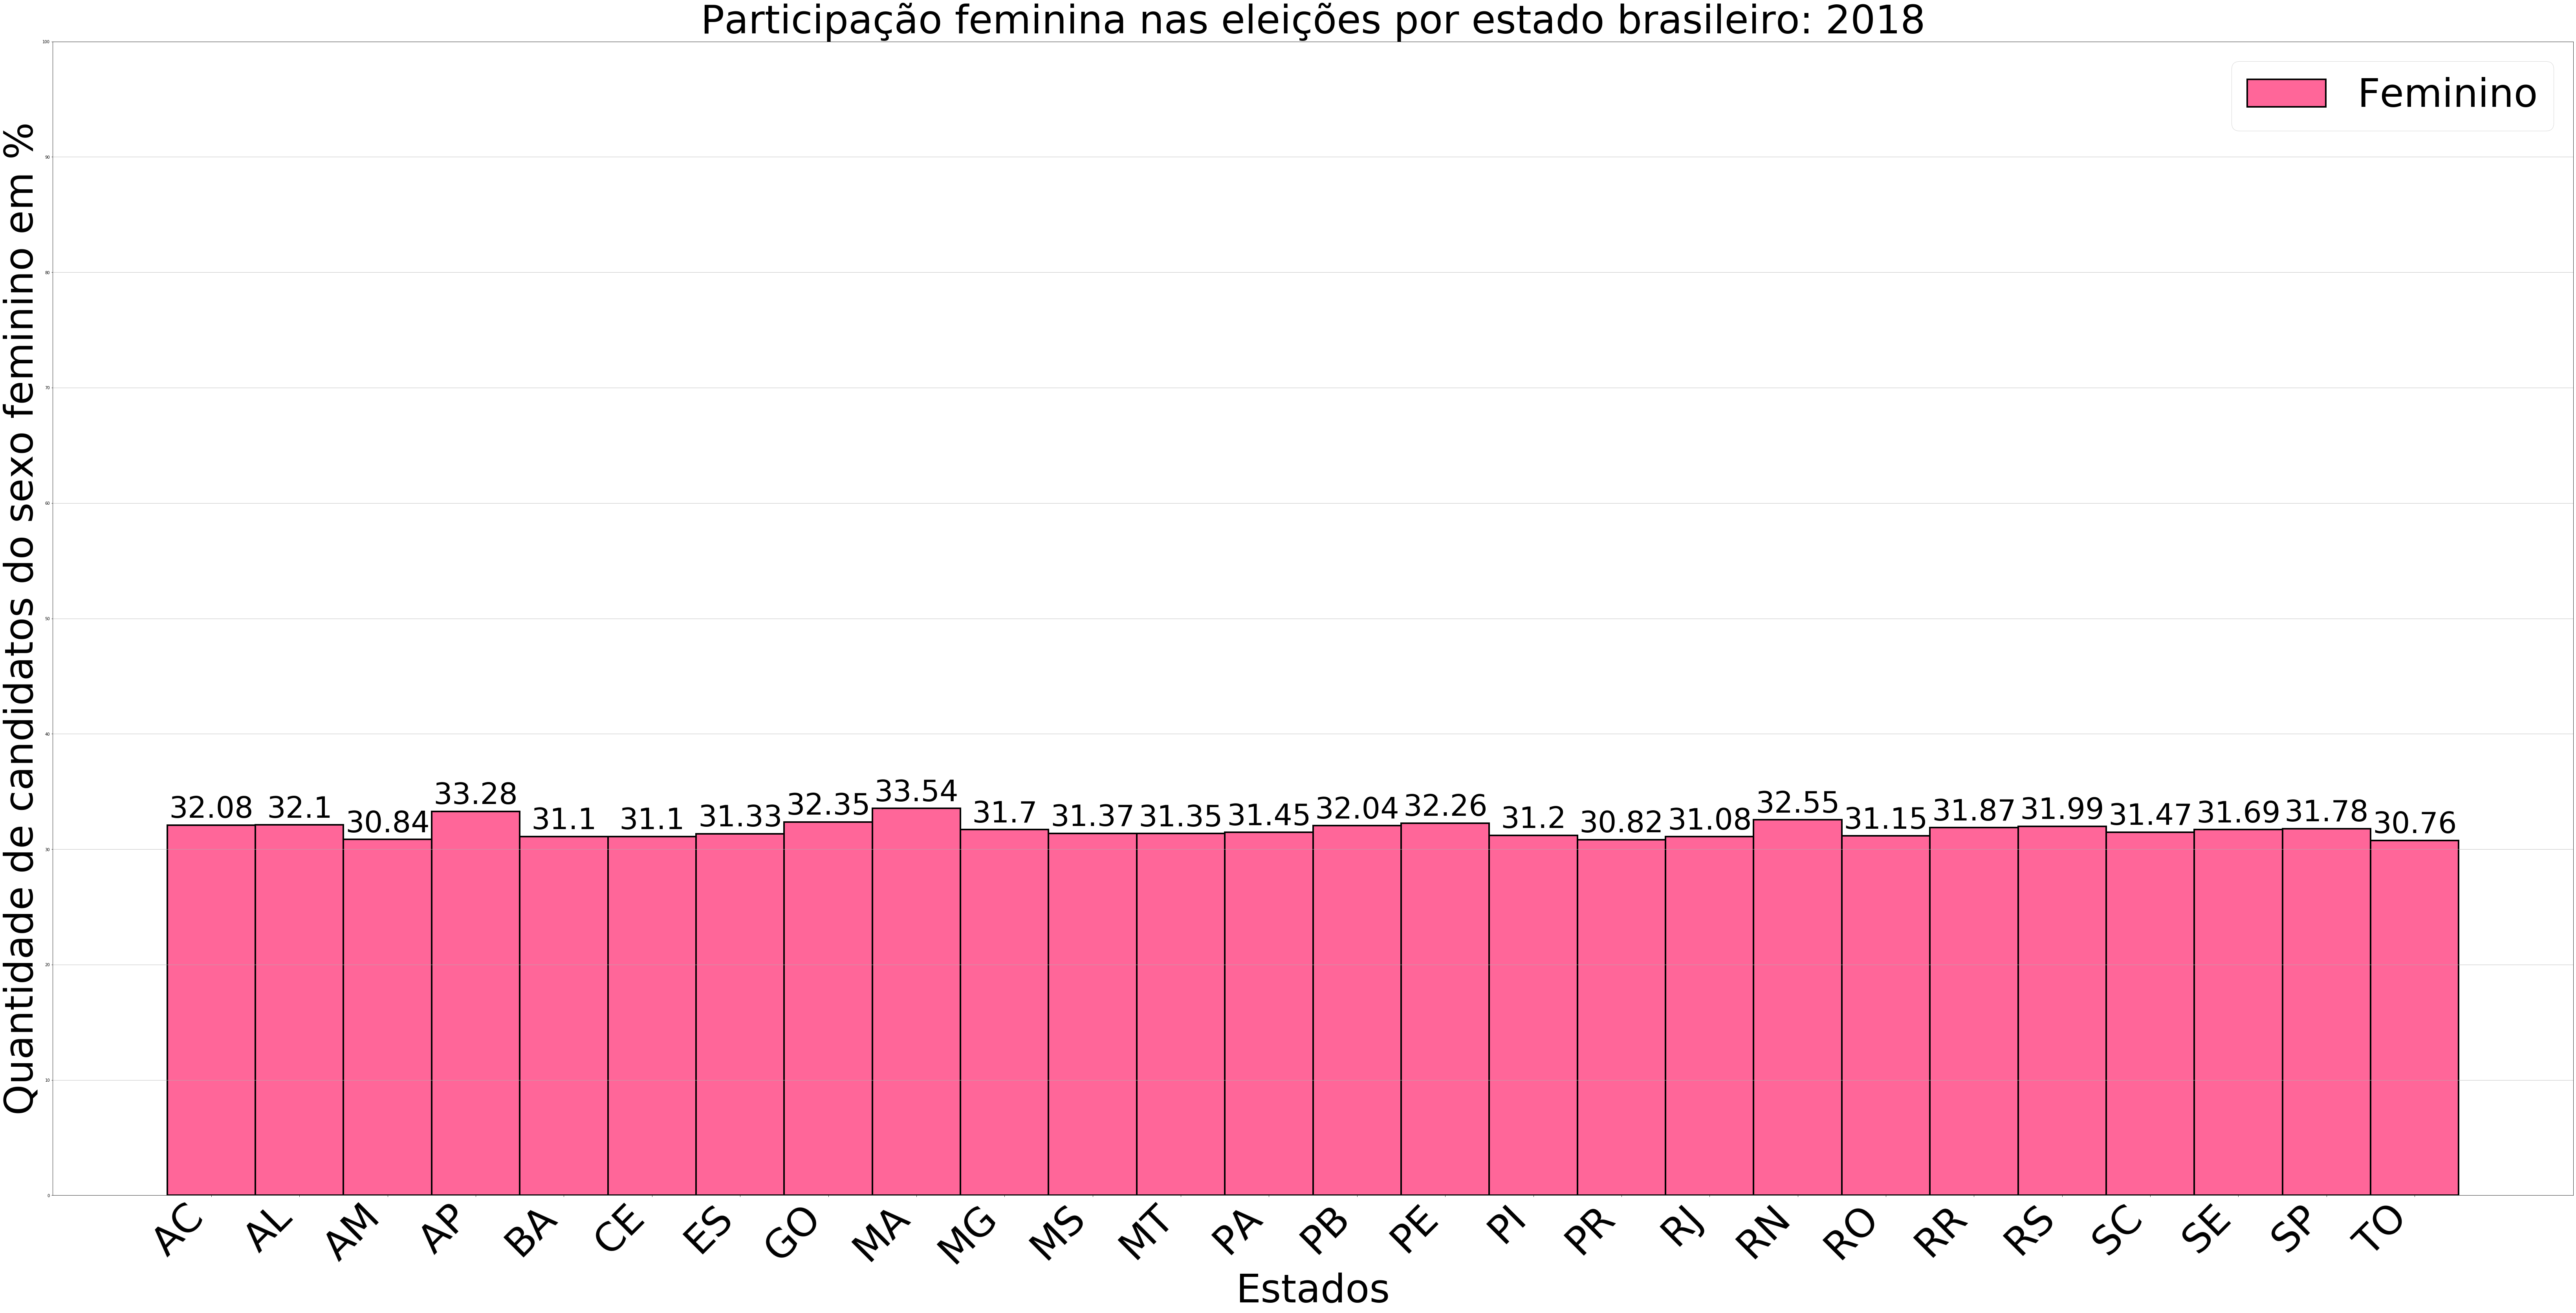

SELECIONANDO DADOS DOS PARTIDOS DE 2018
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Partidos\2018
Gráfico criado com sucesso!


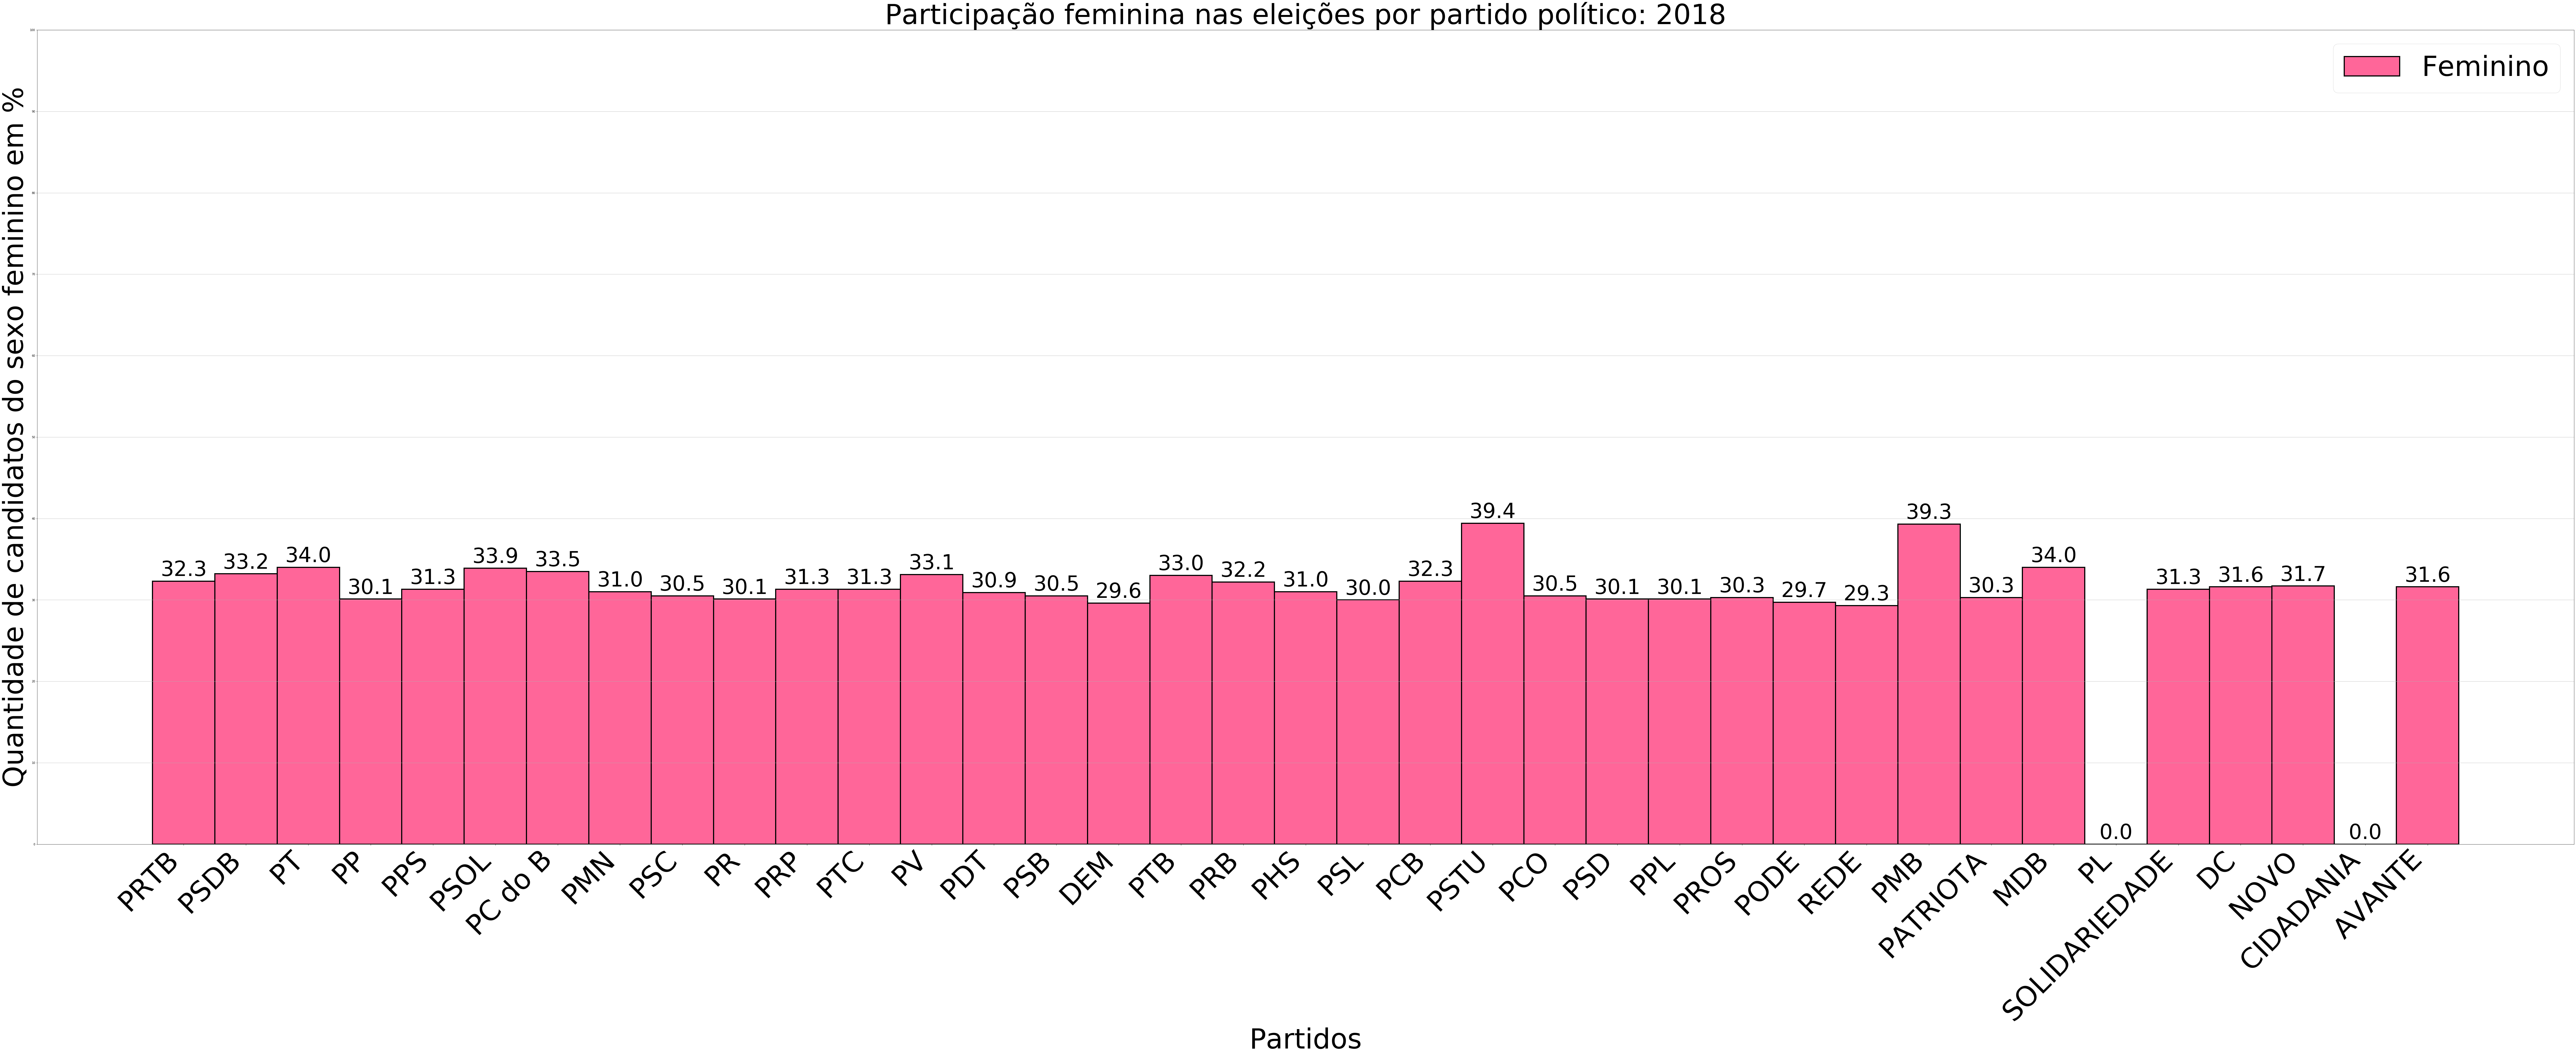

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->0


In [16]:
criarGraficos()

## <center>Resultados do ano de 2020</center>

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->2020
SELECIONANDO DADOS DOS ESTADOS DE 2020
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Estados\2020
Gráfico criado com sucesso!


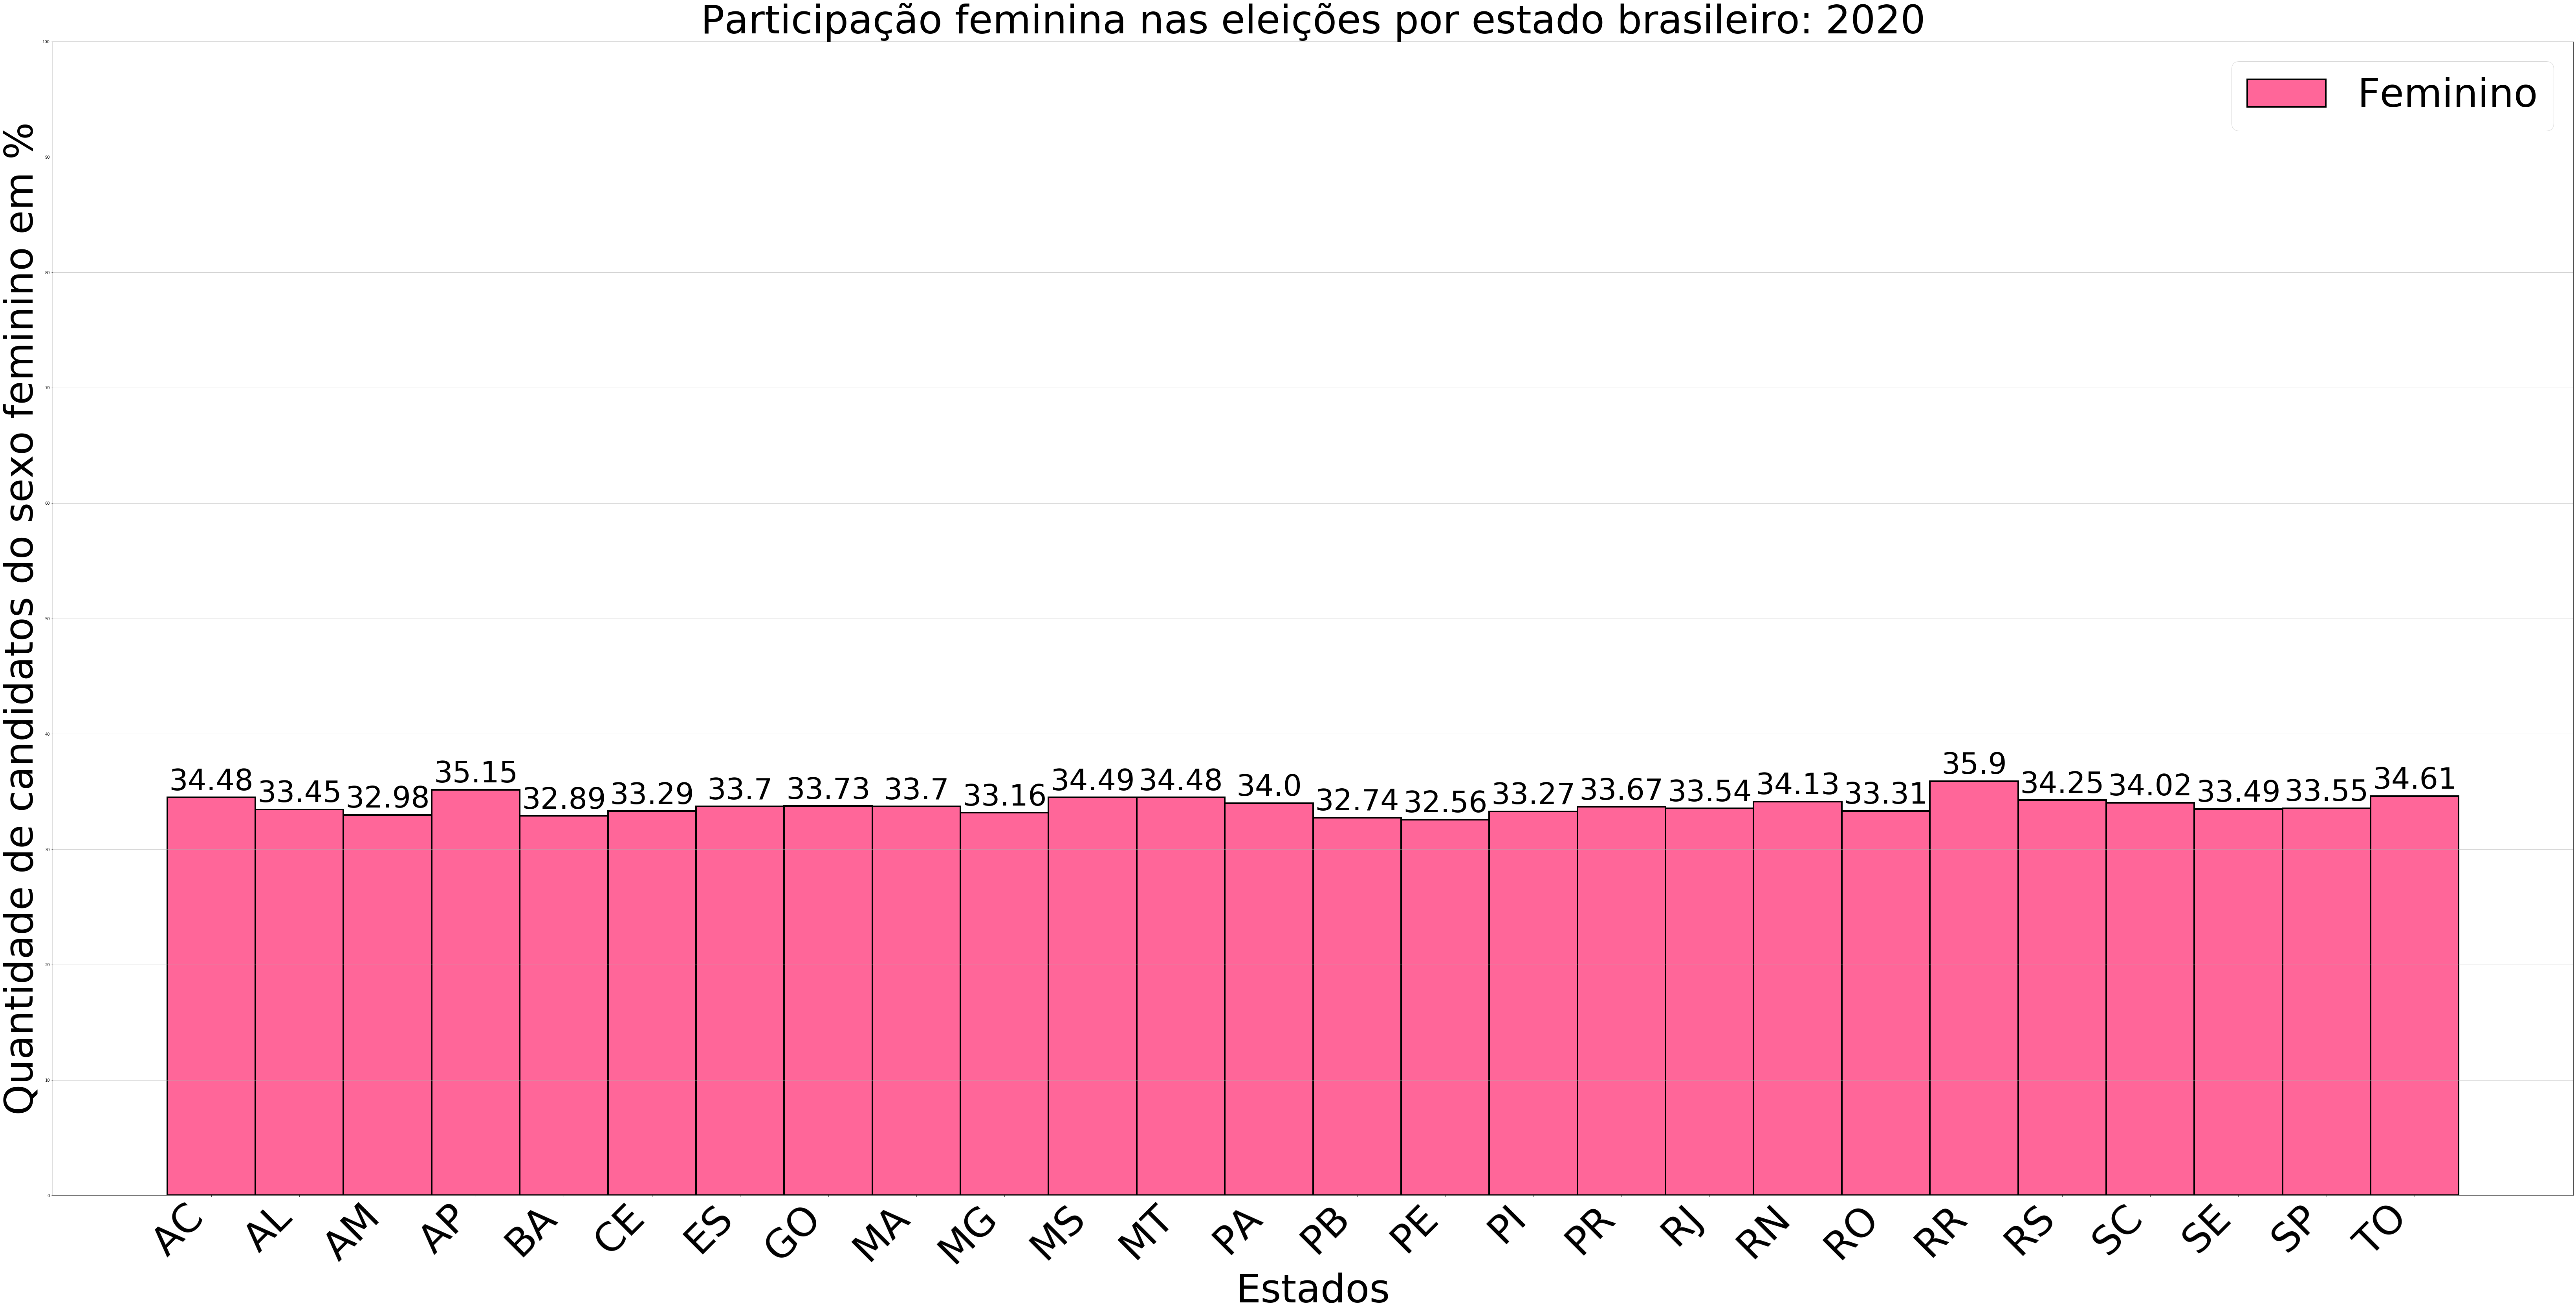

SELECIONANDO DADOS DOS PARTIDOS DE 2020
Criando gráfico...
Gráfico salvo em:  C:\Users\denis\Desktop\EP4\Gráficos\Partidos\2020
Gráfico criado com sucesso!


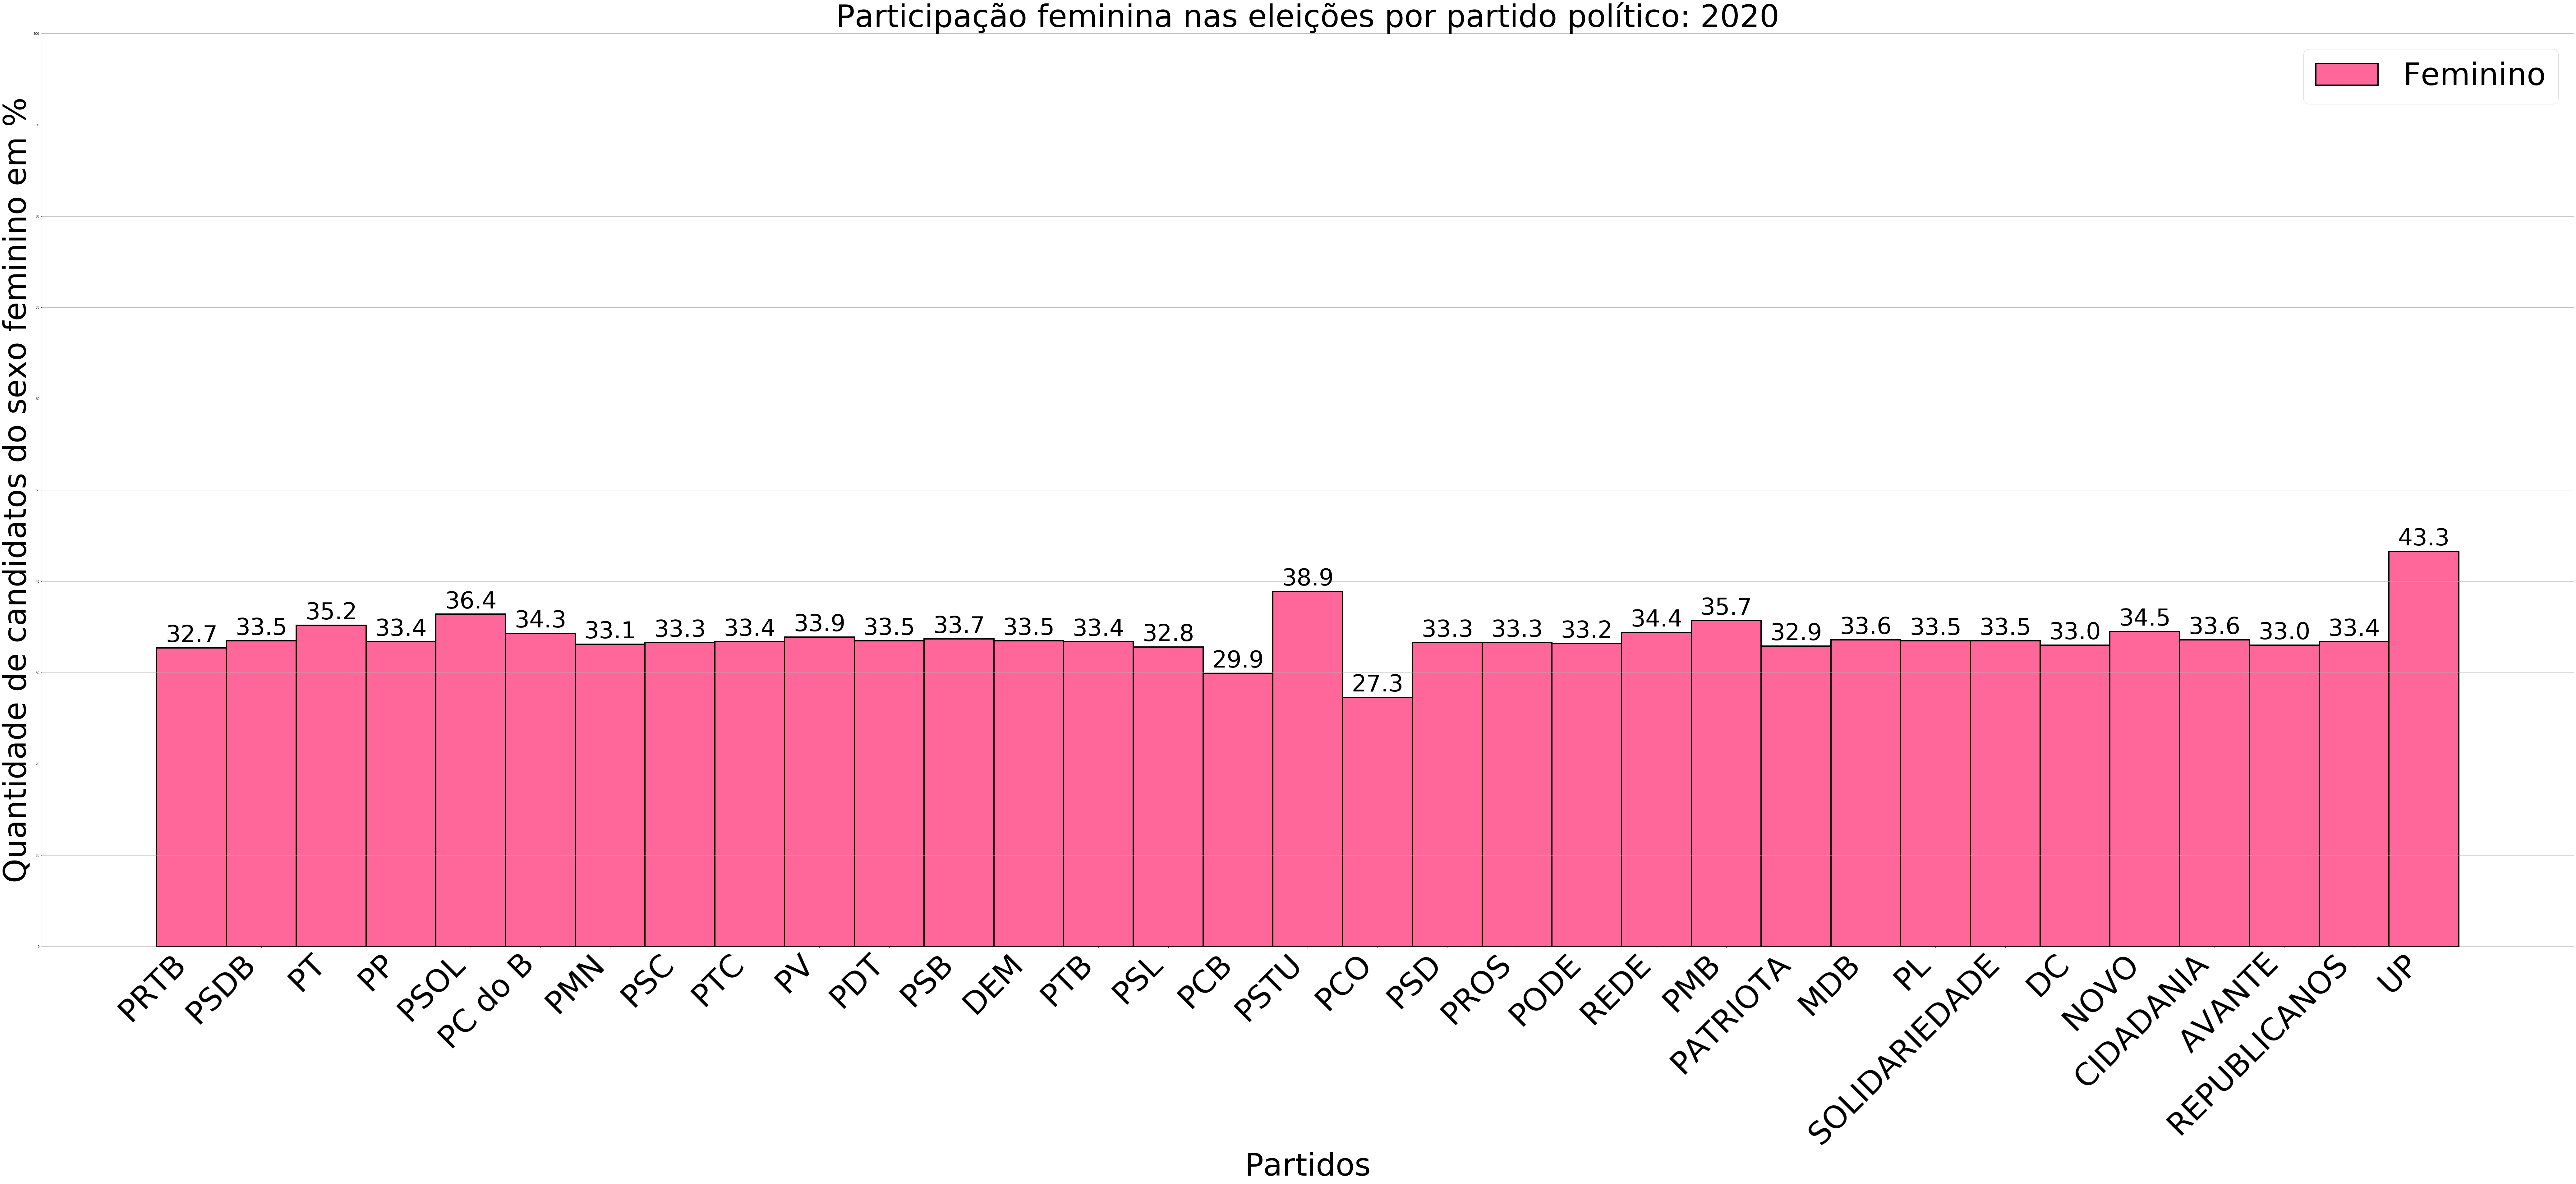

Escolha uma dessas opções: 2010, 2012, 2014, 2016, 2018, 2020
0 para sair
->0


In [17]:
criarGraficos()